# Capstone Project

## Predicting NBA Player Postions with Machine Learning

Based on data from the 2016-2017 NBA regular season, it is my objective to determine how players group together. Can a player's position can be determined based on their performance statistically, and how do those groupings differ from the 5 traditional positions, if at all?

The basic idea is that I want to take full set of NBA players and divide them into $k$ sections, and determine how each of the observations are similar (or dissimilar) to every other cluster identified.

In [1]:
# Import packages to set up and work in DataFrame
import numpy as np     # Scientific computing
import pandas as pd     # Build out DataFrame
import scipy.stats as stats

# Import packages for plotting and visualizations
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")     # Control the appearances of the plots

%matplotlib inline  
%config InlineBackend.figure_format = 'retina'

## Exploratory Data Analysis

Loading and cleaning the dataset pulled from basketball-reference.com and creating graphical displays of that data


## Data cleaning/munging

To get started, I first want to load the dataset of all NBA Players who played during the 2016-2017 regular season. From there, I'll check that the DataFrame is aligned as expected, and some NBA basics (30 teams, 5 positions, 82 maximum games played) are accounted for.

This will be the beginnings of setting up the data in a manageable way, so that I can begin to answer some additional questions while working towards modeling preparation.

In [2]:
# Load and view the dataset of all players who played in the NBA during the 2016-2017 regular season

nba = pd.read_csv('./Datasets/All 2016-2017 NBA Players.csv')

nba.head()

,Player,Position,Age,Team,Games Played,Games Started,Min Played,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,A.J. Hammons,C,24,DAL,22,0,163,17,42,0.405,...,0.450,8,28,36,4,1,13,10,21,48
1,Aaron Brooks,PG,32,IND,65,0,894,121,300,0.403,...,0.800,18,51,69,125,25,9,66,93,322
2,Aaron Gordon,SF,21,ORL,80,72,2298,393,865,0.454,...,0.719,116,289,405,150,65,40,89,172,1019
3,Aaron Harrison,SG,22,CHO,5,0,17,0,4,0.000,...,0.500,0,3,3,3,0,0,0,2,1
4,Adreian Payne,PF,25,MIN,18,0,135,23,54,0.426,...,0.737,9,24,33,7,8,7,8,32,63


In [3]:
nba.shape

(486, 29)

In [4]:
# There are 30 teams in the NBA, so I want to verify that the number of teams are accounted for
# For the players who were traded at some point during the season, their team is listed as TOT

print len(nba['Team'].unique())
nba['Team'].unique()

31


array(['DAL', 'IND', 'ORL', 'CHO', 'MIN', 'BOS', 'LAC', 'PHO', 'UTA',
       'OKC', 'PHI', 'NOP', 'POR', 'DEN', 'GSW', 'DET', 'TOT', 'MEM',
       'BRK', 'SAC', 'HOU', 'CHI', 'WAS', 'LAL', 'TOR', 'SAS', 'NYK',
       'CLE', 'ATL', 'MIA', 'MIL'], dtype=object)

In [5]:
# There are 82 games played during the course of the NBA reguar season. Here, I want to verify that 
# no player has more than 82 games played.

nba['Games Played'].max()

82

In [6]:
# Ensure that all 5 traditional positions are accounted for

nba['Position'].unique()

array(['C', 'PG', 'SF', 'SG', 'PF'], dtype=object)

In [7]:
# Verify the basic statistics columns are loaded in the DataFrame

nba.columns

Index([u'Player', u'Position', u'Age', u'Team', u'Games Played',
       u'Games Started', u'Min Played', u'FG', u'FGA', u'FG%', u'3P', u'3PA',
       u'3P%', u'2P', u'2PA', u'2P%', u'eFG%', u'FT', u'FTA', u'FT%', u'ORB',
       u'DRB', u'TRB', u'AST', u'STL', u'BLK', u'TOV', u'PF', u'PTS'],
      dtype='object')

In [8]:
# Are there any null values?

nba.isnull().sum()

Player            0
Position          0
Age               0
Team              0
Games Played      0
Games Started     0
Min Played        0
FG                0
FGA               0
FG%               1
3P                0
3PA               0
3P%              36
2P                0
2PA               0
2P%               2
eFG%              1
FT                0
FTA               0
FT%              15
ORB               0
DRB               0
TRB               0
AST               0
STL               0
BLK               0
TOV               0
PF                0
PTS               0
dtype: int64

In [9]:
# Who are the players who have a 0% 3P%? Can they be dropped?

nba[nba['3P%'] == 0]

# Decided not to drop these players. Will work around 3P% concerns
# NEXT STEPS IDEA: Impute the data (most likely with 0) & re-run models

,Player,Position,Age,Team,Games Played,Games Started,Min Played,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
3,Aaron Harrison,SG,22,CHO,5,0,17,0,4,0.000,...,0.500,0,3,3,3,0,0,0,2,1
6,Al Jefferson,C,32,IND,66,1,931,235,471,0.499,...,0.765,75,203,278,57,19,16,33,125,535
8,Alan Williams,C,24,PHO,47,0,708,138,267,0.517,...,0.625,94,198,292,23,27,32,37,125,346
13,Alexis Ajinca,C,28,NOP,39,15,584,89,178,0.500,...,0.725,46,131,177,12,20,22,31,77,207
16,Alonzo Gee,SF,29,DEN,13,0,89,3,14,0.214,...,0.556,4,11,15,6,5,1,4,14,11
22,Andrew Bogut,C,32,TOT,27,21,583,38,81,0.469,...,0.273,56,162,218,49,13,25,43,86,79
38,Ben Bentil,PF,21,DAL,3,0,10,0,3,0.000,...,NaN,0,2,2,0,0,0,1,1,0
49,Brandan Wright,PF,29,MEM,28,5,447,83,135,0.615,...,0.657,31,47,78,15,11,20,10,42,189
74,Chris Andersen,C,38,CLE,12,0,114,9,22,0.409,...,0.714,9,22,31,5,5,7,5,20,28
77,Christian Wood,PF,21,CHO,13,0,107,12,23,0.522,...,0.733,14,15,29,2,3,6,7,11,35


In [10]:
# Filter out players who have played fewer than 30 games

nba = nba[nba['Games Played'] > 30]

In [11]:
def general_position(row):
    if 'C' in row:
        category = 'C'
    elif 'SF' in row:
        category = 'F'
    elif 'PF' in row:
        category = 'F'
    elif 'SG' in row:
        category = 'G'
    elif 'PG' in row:
        category = 'G'
    return category

In [12]:
nba['General Position'] = nba['Position'].apply(general_position)

In [13]:
def numbered_position(row):
    if 'C' in row:
        category = '5'
    elif 'PF' in row:
        category = '4'
    elif 'SF' in row:
        category = '3'
    elif 'SG' in row:
        category = '2'
    elif 'PG' in row:
        category = '1'
    return category

In [14]:
nba['Numbered Position'] = nba['Position'].apply(numbered_position)

In [15]:
nba['A:T Ratio'] = nba['AST'] / nba['TOV']

In [16]:
nba['Blocks Per Game'] = nba['BLK'] / nba['Games Played']

In [17]:
nba['TO:MP Ratio'] = nba['TOV'] / nba['Min Played']

In [18]:
# View final copy of DataFrame before saving and moving on to plotting the data
nba.head(4)

,Player,Position,Age,Team,Games Played,Games Started,Min Played,FG,FGA,FG%,...,STL,BLK,TOV,PF,PTS,General Position,Numbered Position,A:T Ratio,Blocks Per Game,TO:MP Ratio
1,Aaron Brooks,PG,32,IND,65,0,894,121,300,0.403,...,25,9,66,93,322,G,1,1.893939,0.138462,0.073826
2,Aaron Gordon,SF,21,ORL,80,72,2298,393,865,0.454,...,65,40,89,172,1019,F,3,1.685393,0.500000,0.038729
5,Al Horford,C,30,BOS,68,68,2193,379,801,0.473,...,52,86,115,138,952,C,5,2.930435,1.264706,0.052440
6,Al Jefferson,C,32,IND,66,1,931,235,471,0.499,...,19,16,33,125,535,C,5,1.727273,0.242424,0.035446


In [19]:
# Save the cleaned DataFrame as a csv file in same directory:

nba.to_csv("./2016-2017 NBA Players (Data Cleaned).csv", sep = ',', encoding = 'utf-8', index = False)

## Quanititative EDA

In [20]:
# Import packages to set up and work in DataFrame
import numpy as np     # Scientific computing
import pandas as pd     # Build out DataFrame
import scipy.stats as stats

# Import packages for plotting and visualizations
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')     # Control the appearances of the seaborn plots

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [21]:
# Open the csv file as a data frame:

df = pd.read_csv("./2016-2017 NBA Players (Data Cleaned).csv")

df.head()

,Player,Position,Age,Team,Games Played,Games Started,Min Played,FG,FGA,FG%,...,STL,BLK,TOV,PF,PTS,General Position,Numbered Position,A:T Ratio,Blocks Per Game,TO:MP Ratio
0,Aaron Brooks,PG,32,IND,65,0,894,121,300,0.403,...,25,9,66,93,322,G,1,1.893939,0.138462,0.073826
1,Aaron Gordon,SF,21,ORL,80,72,2298,393,865,0.454,...,65,40,89,172,1019,F,3,1.685393,0.500000,0.038729
2,Al Horford,C,30,BOS,68,68,2193,379,801,0.473,...,52,86,115,138,952,C,5,2.930435,1.264706,0.052440
3,Al Jefferson,C,32,IND,66,1,931,235,471,0.499,...,19,16,33,125,535,C,5,1.727273,0.242424,0.035446
4,Alan Williams,C,24,PHO,47,0,708,138,267,0.517,...,27,32,37,125,346,C,5,0.621622,0.680851,0.052260


In [22]:
# Players who played in all 82 games

df[df['Games Played'] == 82]

,Player,Position,Age,Team,Games Played,Games Started,Min Played,FG,FGA,FG%,...,STL,BLK,TOV,PF,PTS,General Position,Numbered Position,A:T Ratio,Blocks Per Game,TO:MP Ratio
17,Andrew Wiggins,SF,21,MIN,82,82,3048,709,1570,0.452,...,82,30,187,183,1933,F,3,1.010695,0.365854,0.061352
42,Buddy Hield,SG,23,TOT,82,55,1888,327,767,0.426,...,38,9,101,115,866,G,2,1.198020,0.109756,0.053496
55,Corey Brewer,SF,30,TOT,82,11,1281,147,348,0.422,...,61,20,55,133,371,F,3,1.763636,0.243902,0.042935
104,Elfrid Payton,PG,22,ORL,82,58,2412,430,912,0.471,...,88,40,178,177,1046,G,1,2.971910,0.487805,0.073798
109,Ersan Ilyasova,PF,29,TOT,82,52,2142,384,890,0.431,...,58,23,116,211,1071,F,4,1.215517,0.280488,0.054155
124,Gorgui Dieng,PF,27,MIN,82,82,2653,332,661,0.502,...,88,95,107,254,816,F,4,1.476636,1.158537,0.040332
145,Jamal Crawford,SG,36,LAC,82,1,2157,359,870,0.413,...,61,14,134,115,1008,G,2,1.597015,0.170732,0.062123
146,Jamal Murray,SG,19,DEN,82,10,1764,295,730,0.404,...,51,24,113,124,811,G,2,1.504425,0.292683,0.064059
161,Jeff Teague,PG,28,IND,82,82,2657,402,909,0.442,...,100,32,216,165,1254,G,1,2.958333,0.390244,0.081295
171,Joe Ingles,SF,29,UTA,82,26,1972,204,451,0.452,...,96,8,107,163,581,F,3,2.102804,0.097561,0.054260


In [23]:
# Players who played in at least 80 games

df[df['Games Played'] > 80]

,Player,Position,Age,Team,Games Played,Games Started,Min Played,FG,FGA,FG%,...,STL,BLK,TOV,PF,PTS,General Position,Numbered Position,A:T Ratio,Blocks Per Game,TO:MP Ratio
12,Andre Drummond,C,23,DET,81,81,2409,483,911,0.530,...,124,89,152,237,1105,C,5,0.592105,1.098765,0.063097
17,Andrew Wiggins,SF,21,MIN,82,82,3048,709,1570,0.452,...,82,30,187,183,1933,F,3,1.010695,0.365854,0.061352
27,Bismack Biyombo,C,24,ORL,81,27,1793,179,339,0.528,...,25,91,95,202,483,C,5,0.778947,1.123457,0.052984
31,Bojan Bogdanovic,SF,27,TOT,81,54,2083,376,845,0.445,...,34,7,131,146,1113,F,3,0.847328,0.086420,0.062890
36,Brandon Jennings,PG,27,TOT,81,13,1802,192,535,0.359,...,70,4,128,116,577,G,1,3.085938,0.049383,0.071032
42,Buddy Hield,SG,23,TOT,82,55,1888,327,767,0.426,...,38,9,101,115,866,G,2,1.198020,0.109756,0.053496
55,Corey Brewer,SF,30,TOT,82,11,1281,147,348,0.422,...,61,20,55,133,371,F,3,1.763636,0.243902,0.042935
67,Dario Saric,PF,22,PHI,81,36,2129,381,927,0.411,...,57,30,183,162,1040,F,4,0.994536,0.370370,0.085956
75,DeAndre Jordan,C,28,LAC,81,81,2570,412,577,0.714,...,51,134,115,212,1029,C,5,0.834783,1.654321,0.044747
94,Domantas Sabonis,PF,20,OKC,81,66,1632,192,481,0.399,...,39,32,83,200,479,F,4,0.987952,0.395062,0.050858


In [24]:
# Players who played in at least 75 games

df[df['Games Played'] > 75]

,Player,Position,Age,Team,Games Played,Games Started,Min Played,FG,FGA,FG%,...,STL,BLK,TOV,PF,PTS,General Position,Numbered Position,A:T Ratio,Blocks Per Game,TO:MP Ratio
1,Aaron Gordon,SF,21,ORL,80,72,2298,393,865,0.454,...,65,40,89,172,1019,F,3,1.685393,0.500000,0.038729
7,Alex Len,C,23,PHO,77,34,1560,230,463,0.497,...,38,98,102,242,613,C,5,0.431373,1.272727,0.065385
10,Allen Crabbe,SG,24,POR,79,7,2254,303,647,0.468,...,54,20,62,171,845,G,2,1.516129,0.253165,0.027507
11,Amir Johnson,PF,29,BOS,80,77,1608,213,370,0.576,...,51,62,77,211,520,F,4,1.818182,0.775000,0.047886
12,Andre Drummond,C,23,DET,81,81,2409,483,911,0.530,...,124,89,152,237,1105,C,5,0.592105,1.098765,0.063097
13,Andre Iguodala,SF,33,GSW,76,0,1998,219,415,0.528,...,76,39,58,97,574,F,3,4.500000,0.513158,0.029029
14,Andre Roberson,SF,25,OKC,79,79,2376,215,463,0.464,...,94,79,51,204,522,F,3,1.549020,1.000000,0.021465
17,Andrew Wiggins,SF,21,MIN,82,82,3048,709,1570,0.452,...,82,30,187,183,1933,F,3,1.010695,0.365854,0.061352
27,Bismack Biyombo,C,24,ORL,81,27,1793,179,339,0.528,...,25,91,95,202,483,C,5,0.778947,1.123457,0.052984
31,Bojan Bogdanovic,SF,27,TOT,81,54,2083,376,845,0.445,...,34,7,131,146,1113,F,3,0.847328,0.086420,0.062890


In [25]:
df['Team'].value_counts()

TOT    40
SAS    14
UTA    14
GSW    13
DET    13
PHO    13
MEM    13
IND    13
NYK    13
POR    12
MIL    12
BRK    12
CHI    12
BOS    12
MIN    11
TOR    11
ATL    11
MIA    11
DEN    11
WAS    11
LAL    11
CLE    11
LAC    11
ORL    11
CHO    10
DAL    10
PHI    10
HOU     9
NOP     9
SAC     9
OKC     9
Name: Team, dtype: int64

In [26]:
df['Position'].value_counts()

SG    82
PG    77
C     76
SF    75
PF    72
Name: Position, dtype: int64

In [27]:
df.groupby(['Position'])['Min Played'].mean()

Position
C     1406.500000
PF    1411.805556
PG    1528.584416
SF    1628.253333
SG    1580.036585
Name: Min Played, dtype: float64

In [28]:
df['General Position'].value_counts()

G    159
F    147
C     76
Name: General Position, dtype: int64

In [29]:
# View the basic descriptive statistics for the dataset

df.describe()

,Age,Games Played,Games Started,Min Played,FG,FGA,FG%,3P,3PA,3P%,...,AST,STL,BLK,TOV,PF,PTS,Numbered Position,A:T Ratio,Blocks Per Game,TO:MP Ratio
count,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,364.000000,...,382.000000,382.000000,382.000000,382.000000,382.00000,382.000000,382.000000,382.000000,382.000000,382.000000
mean,26.500000,64.633508,31.780105,1512.897906,245.769634,536.617801,0.454851,60.903141,169.795812,0.313000,...,142.178010,48.256545,29.738220,83.738220,123.86911,664.761780,2.968586,1.616558,0.440343,0.053400
std,4.190196,14.571994,29.104280,708.208388,166.594339,352.038891,0.065965,57.429528,149.416714,0.111191,...,138.679997,30.713000,30.413503,60.961022,55.23297,470.574305,1.417572,0.739519,0.413879,0.021040
min,19.000000,31.000000,0.000000,135.000000,24.000000,47.000000,0.292000,0.000000,0.000000,0.000000,...,2.000000,1.000000,0.000000,5.000000,5.00000,58.000000,1.000000,0.250000,0.000000,0.008403
25%,23.000000,54.250000,5.000000,964.250000,117.000000,264.000000,0.409000,15.000000,50.250000,0.293750,...,51.250000,25.000000,9.250000,40.000000,83.25000,316.250000,2.000000,1.033122,0.158276,0.038126
50%,26.000000,68.500000,22.000000,1512.000000,208.000000,461.500000,0.446000,45.500000,136.000000,0.343500,...,98.500000,42.000000,21.000000,67.000000,124.00000,539.500000,3.000000,1.540570,0.326238,0.051095
75%,29.000000,76.750000,61.000000,2084.500000,332.750000,718.500000,0.487750,94.000000,266.750000,0.375000,...,183.750000,66.000000,38.750000,113.750000,161.00000,880.750000,4.000000,2.057705,0.527083,0.064721
max,40.000000,82.000000,82.000000,3048.000000,824.000000,1941.000000,0.714000,324.000000,789.000000,0.538000,...,907.000000,157.000000,214.000000,464.000000,278.00000,2558.000000,5.000000,4.500000,2.641975,0.157448


In [30]:
# Print out a correlation matrix. There are several categories, so it may not be immediately helpful at first glance

df.corr()

,Age,Games Played,Games Started,Min Played,FG,FGA,FG%,3P,3PA,3P%,...,AST,STL,BLK,TOV,PF,PTS,Numbered Position,A:T Ratio,Blocks Per Game,TO:MP Ratio
Age,1.000000,0.045006,-0.003078,0.047960,-0.000436,0.004221,0.026109,0.103295,0.077983,0.126642,...,0.091482,0.026472,-0.084112,0.002497,-0.046622,0.008695,-0.024745,0.204404,-0.100721,-0.054770
Games Played,0.045006,1.000000,0.472985,0.779573,0.590043,0.590881,0.161464,0.406886,0.430976,0.078168,...,0.407092,0.582976,0.376677,0.523713,0.726496,0.568276,0.029809,0.066914,0.212348,0.041093
Games Started,-0.003078,0.472985,1.000000,0.802863,0.742780,0.723211,0.207900,0.428149,0.429452,0.043118,...,0.499683,0.632465,0.454237,0.639658,0.650767,0.725901,0.009120,0.042674,0.385218,0.200374
Min Played,0.047960,0.779573,0.802863,1.000000,0.877728,0.882174,0.141814,0.613253,0.632478,0.158919,...,0.635203,0.786256,0.435090,0.765402,0.765873,0.867067,-0.082019,0.155955,0.314256,0.198461
FG,-0.000436,0.590043,0.742780,0.877728,1.000000,0.982755,0.226554,0.598827,0.607955,0.135789,...,0.641444,0.668838,0.422874,0.834019,0.634225,0.987813,-0.032928,0.057421,0.337157,0.382601
FGA,0.004221,0.590881,0.723211,0.882174,0.982755,1.000000,0.073257,0.682990,0.701848,0.203573,...,0.680666,0.688835,0.328638,0.846327,0.601961,0.986022,-0.132578,0.114961,0.242427,0.394269
FG%,0.026109,0.161464,0.207900,0.141814,0.226554,0.073257,1.000000,-0.276288,-0.321385,-0.356398,...,-0.071431,0.039676,0.504132,0.090894,0.323618,0.159971,0.582594,-0.364623,0.521375,0.000939
3P,0.103295,0.406886,0.428149,0.613253,0.598827,0.682990,-0.276288,1.000000,0.990264,0.519984,...,0.493213,0.485959,-0.085520,0.505801,0.289928,0.667420,-0.370120,0.234495,-0.146203,0.132050
3PA,0.077983,0.430976,0.429452,0.632478,0.607955,0.701848,-0.321385,0.990264,1.000000,0.495509,...,0.522222,0.512729,-0.079315,0.539612,0.306920,0.678320,-0.381137,0.243851,-0.144647,0.159612
3P%,0.126642,0.078168,0.043118,0.158919,0.135789,0.203573,-0.356398,0.519984,0.495509,1.000000,...,0.171106,0.129626,-0.262041,0.090176,-0.033003,0.181912,-0.389278,0.236391,-0.287392,-0.018124


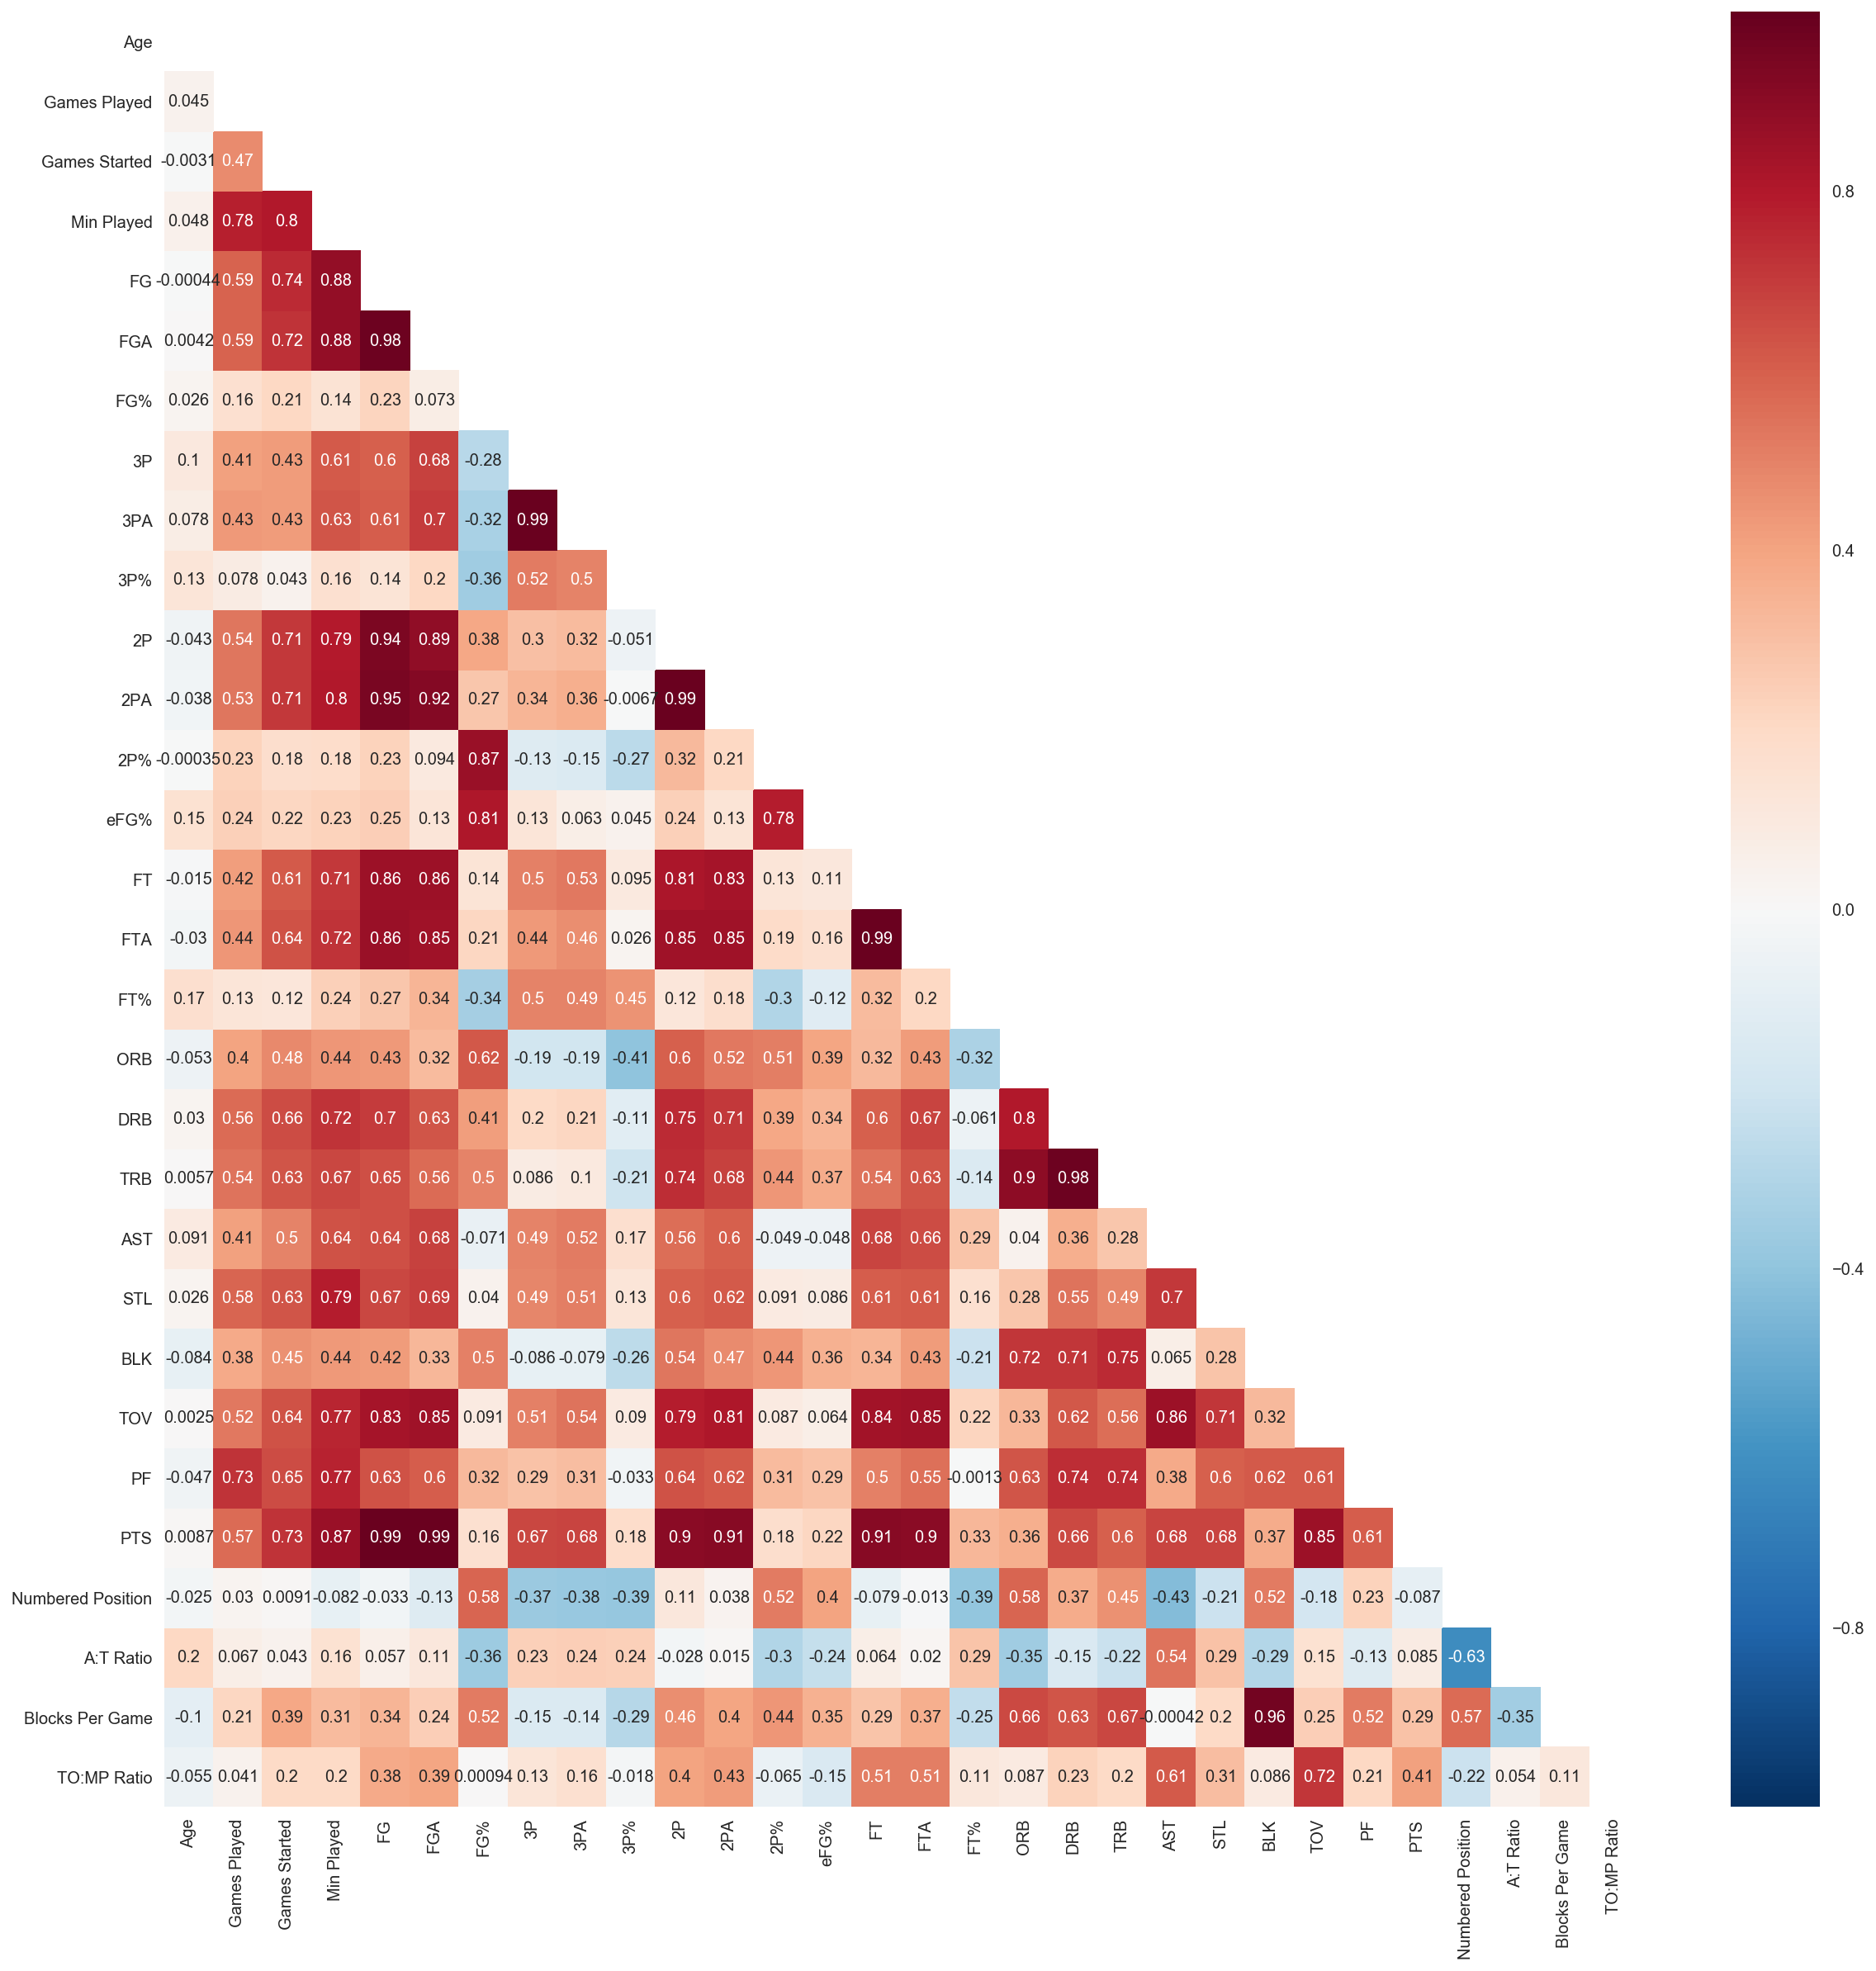

In [31]:
# Show correlation heat map for the dataset. This may help to visualize the correlated features more clearly than the
# correlation matrix above

def correlation_heat_map(df):
    corrs = df.corr()

    # Set the default matplotlib figure size:
    fig, ax = plt.subplots(figsize = (20,20))

    # Generate a mask for the upper triangle (taken from seaborn example gallery)
    mask = np.zeros_like(corrs, dtype = np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Plot the heatmap with seaborn.
    # Assign the matplotlib axis the function returns. This will let us resize the labels.
    ax = sns.heatmap(corrs, mask = mask, annot = True)

    # Resize the labels.
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize = 10, rotation = 90)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize = 10, rotation = 0)

    # If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
    plt.show()
    
correlation_heat_map(df)

After taking a look at the basic statistics and correlations between the stats, there were a few interesting points of note:
- The average age of players in the NBA is 26, and the majority of the players are between the ages of 22 and 30
<br><br>
- Players typically play an average of 64 games, but the standard deviation puts that range from 50 to 78 games for some. Very few play more than 75 games, only 37 players of the 486 in the original dataset played in at least 80, and 17 players logged minutes in all 82 games of the season (This is mostly interesting because of the "resting players" debate that tends to happen more frequently now).
<br><br>
- Of the 5 positions, Centers (C) average the fewest minutes played (1406.5) throughout the season, while Small Forwards (SF) averaged the most minutes (1628.3).
<br><br>
- There are several categories that have a multicolinear relationship because they count or calculate very similar statistics. To proceed with modeling, there will need to be some sort of feature selection process to extract the most important features

## Graphical EDA

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a3dc8d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11ab5ec10>]], dtype=object)

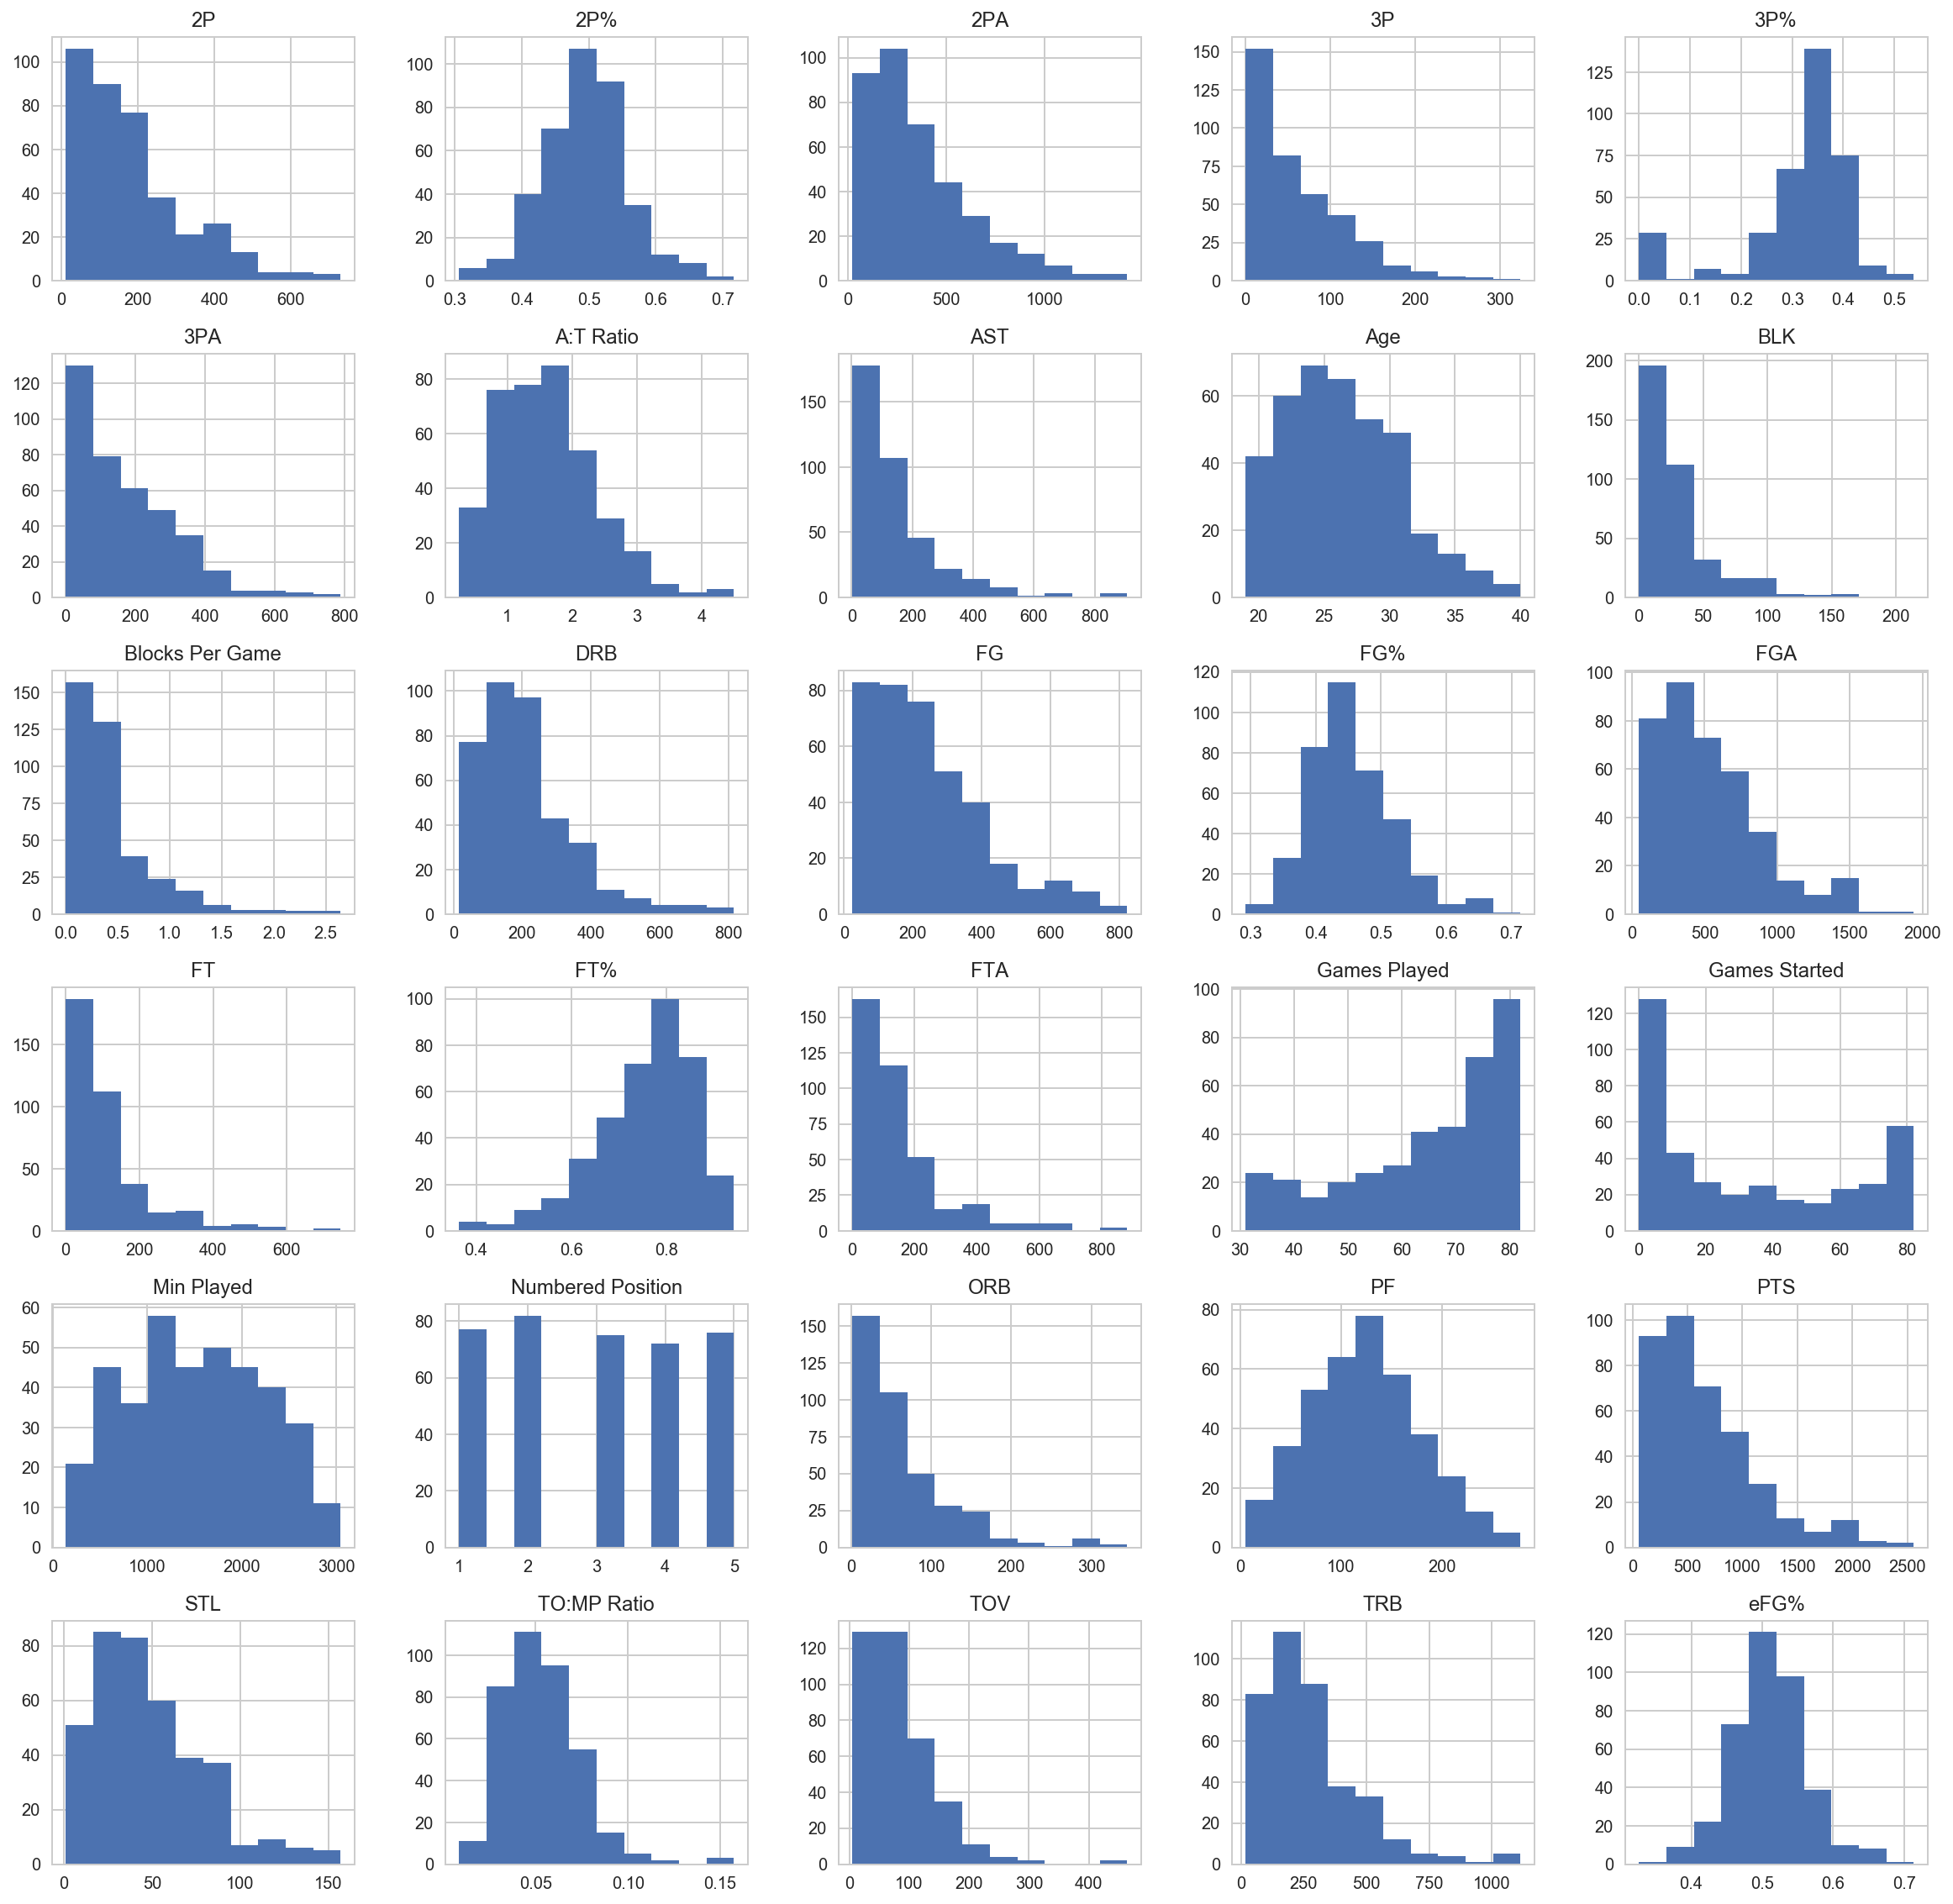

In [32]:
# View the distributions of the various features in the DataFrame

df.hist(figsize = (20, 20))

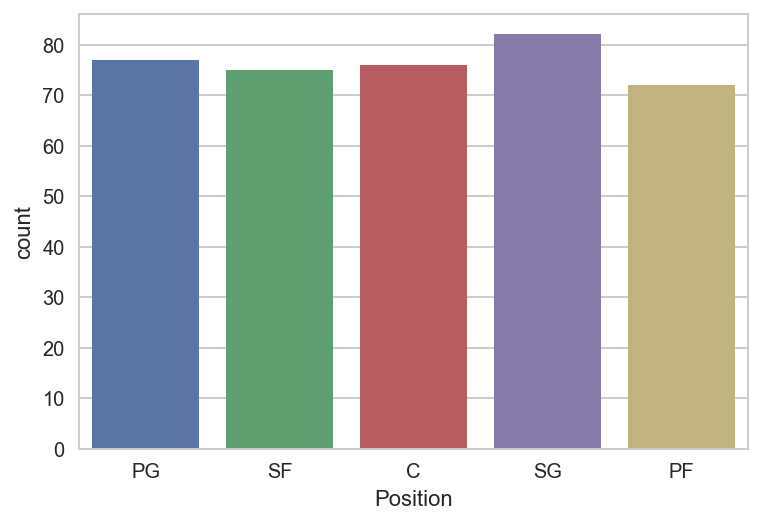

SG    82
PG    77
C     76
SF    75
PF    72
Name: Position, dtype: int64

In [33]:
# How many players are in each of the 5 positions

sns.countplot(x = 'Position', data = df)
plt.show()
df['Position'].value_counts()

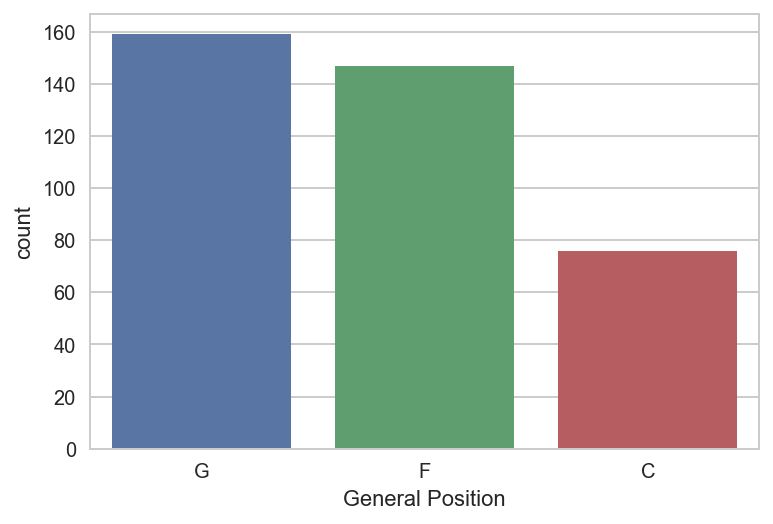

G    159
F    147
C     76
Name: General Position, dtype: int64

In [34]:
# Number of players are in each of the 3 general position categories

sns.countplot(x = 'General Position', data = df)
plt.show()
df['General Position'].value_counts()

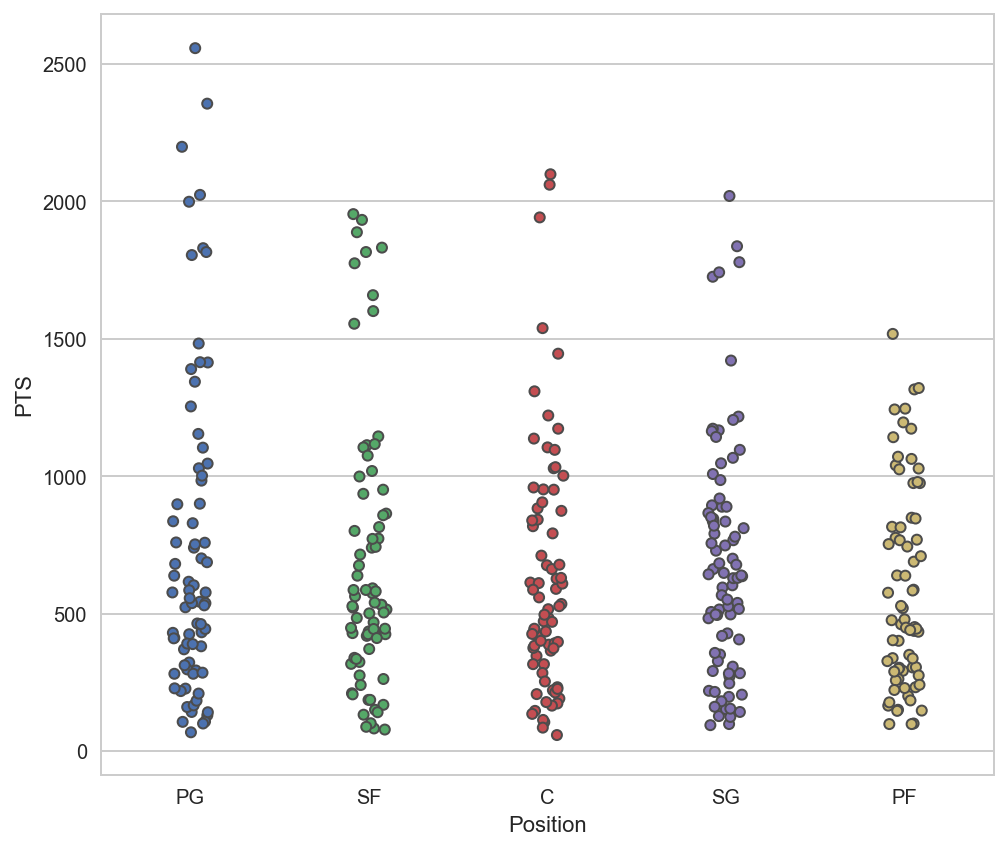

In [35]:
# Points scored by position

plt.figure(figsize=(8, 7))
sns.stripplot(x = 'Position', y = 'PTS', data = df, linewidth = 1, jitter = True)

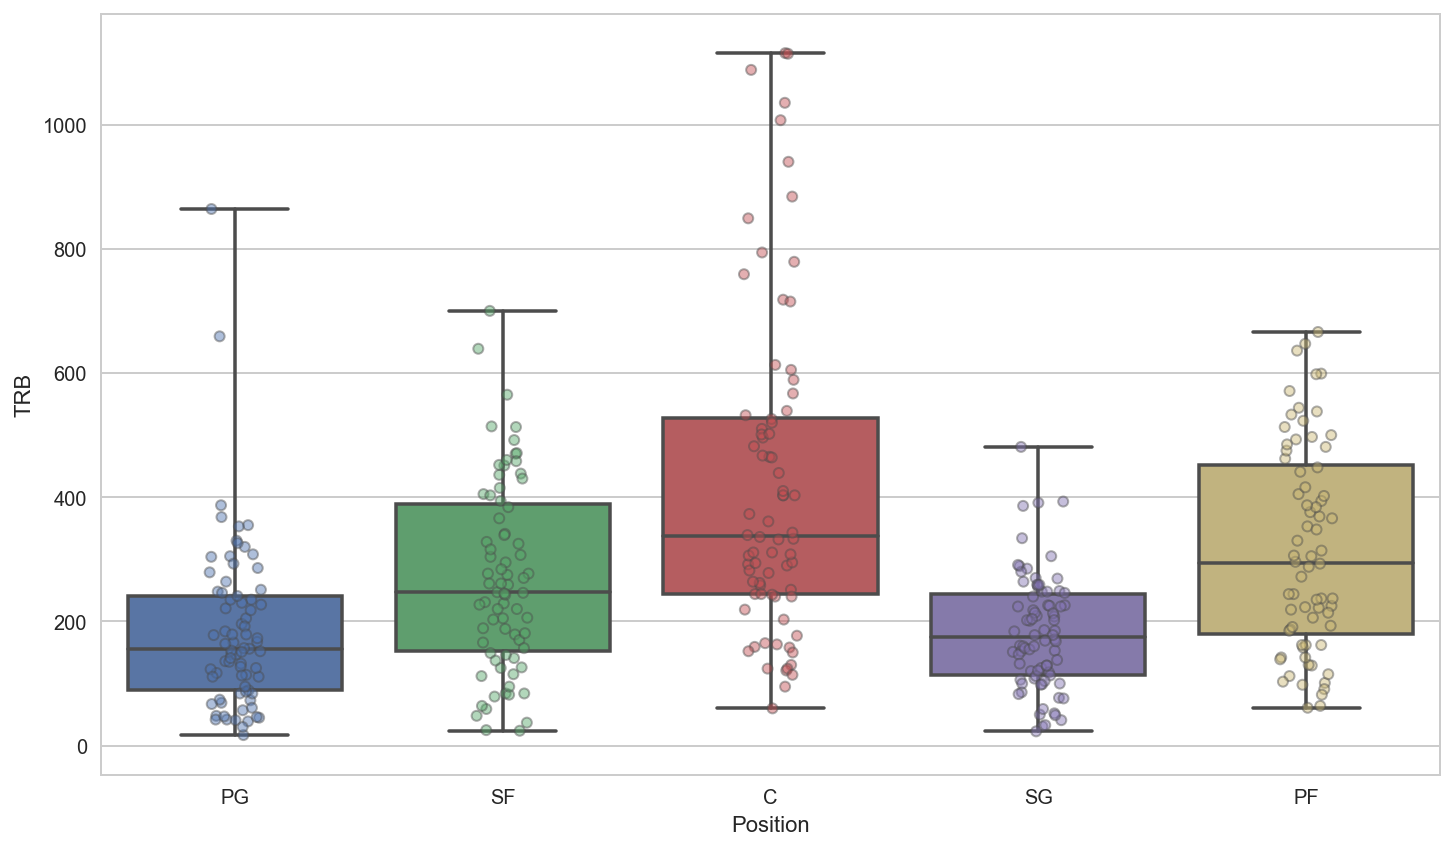

In [36]:
# Total rebounds by position

plt.figure(figsize=(12, 7))
b = sns.boxplot(x = "Position", y = "TRB", data = df, whis = np.inf)
for item in b.get_xticklabels():
    item.set_rotation(0)
sns.stripplot(x = 'Position', y = 'TRB', data = df, linewidth = 1, alpha = 0.45, jitter = True)

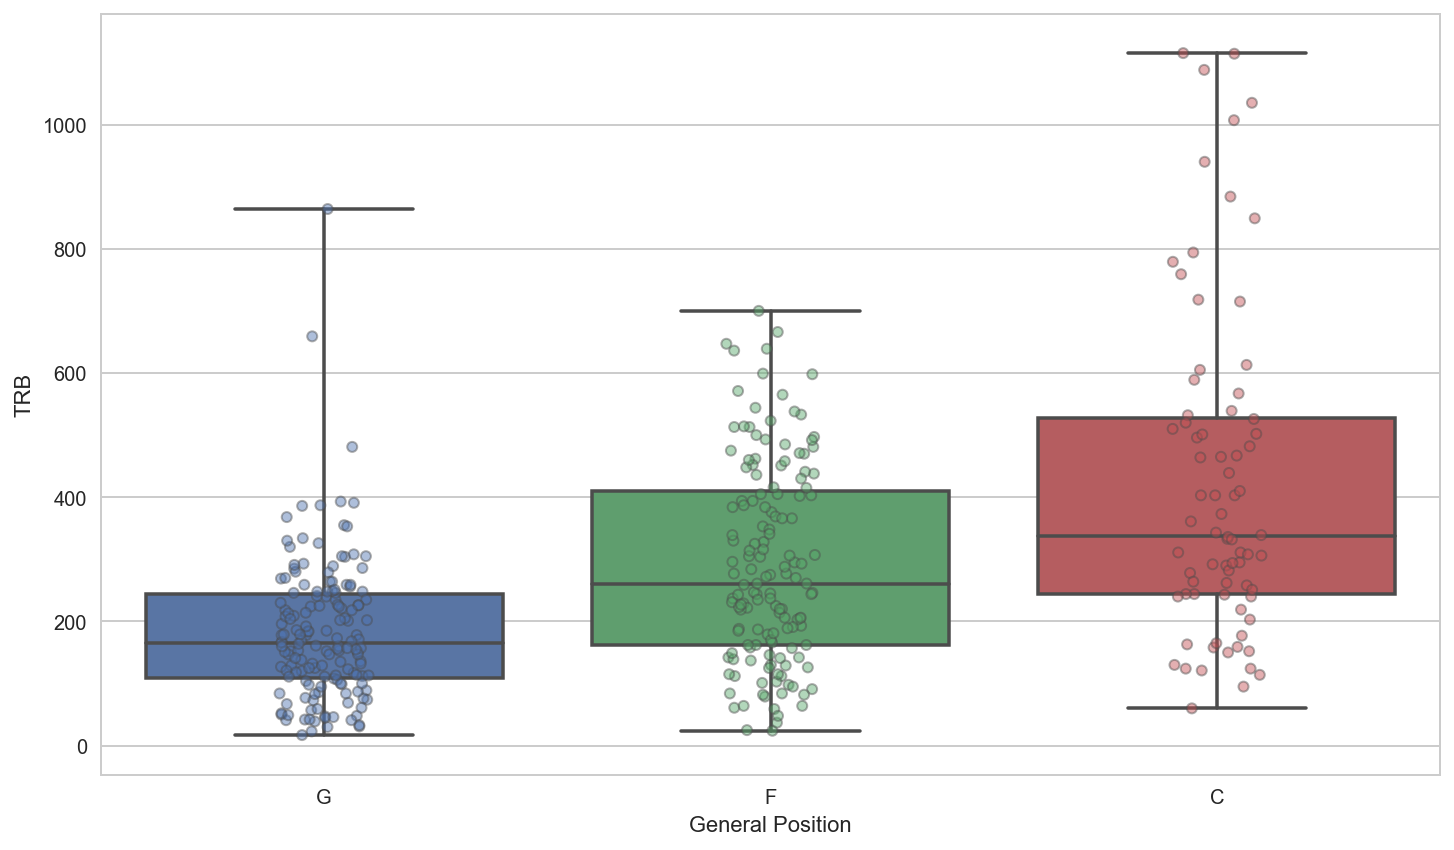

In [37]:
# Combined total rebounds by general positions

plt.figure(figsize=(12, 7))
b = sns.boxplot(x = "General Position", y = "TRB", data = df, whis = np.inf)
for item in b.get_xticklabels():
    item.set_rotation(0)
sns.stripplot(x = 'General Position', y = 'TRB', data = df, linewidth = 1, alpha = 0.45, jitter = True)

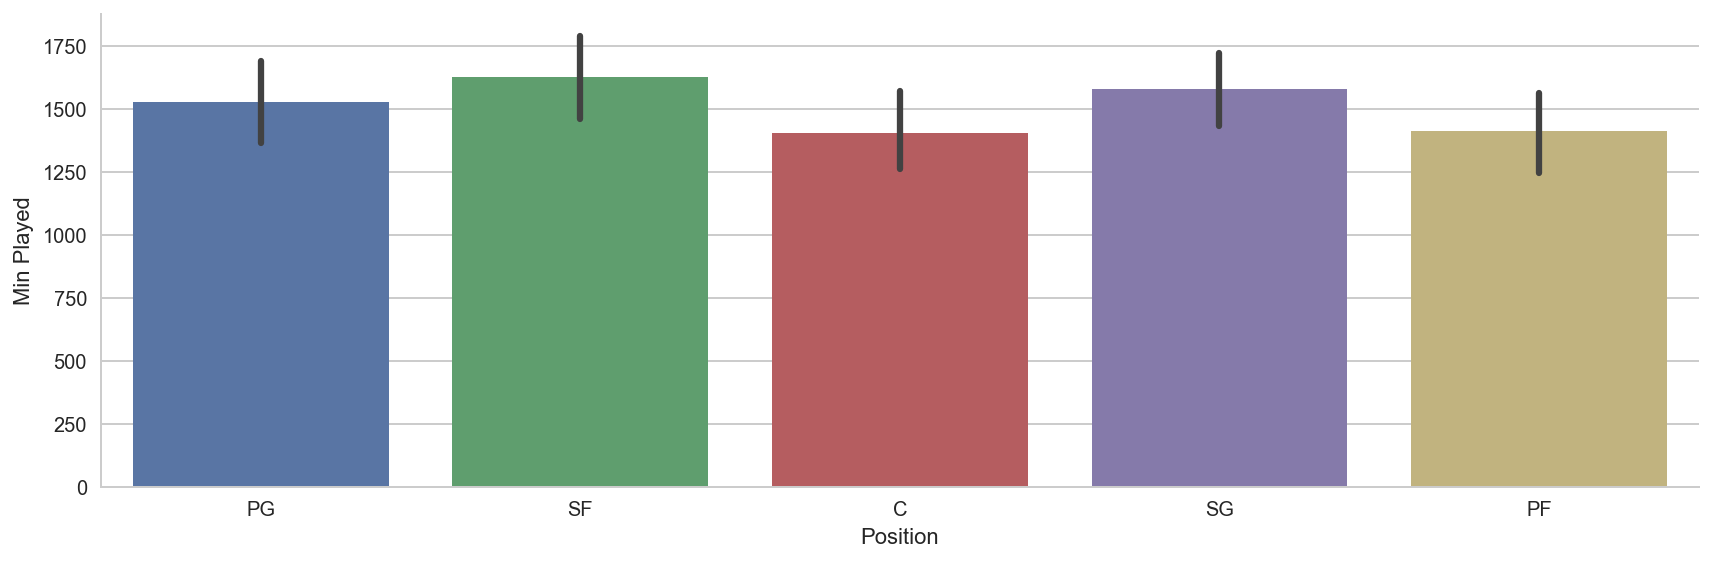

In [38]:
# Are there any positions that earn more playing time than others?

sns.factorplot(x = 'Position', y = 'Min Played', data = df, kind = 'bar', aspect = 3)

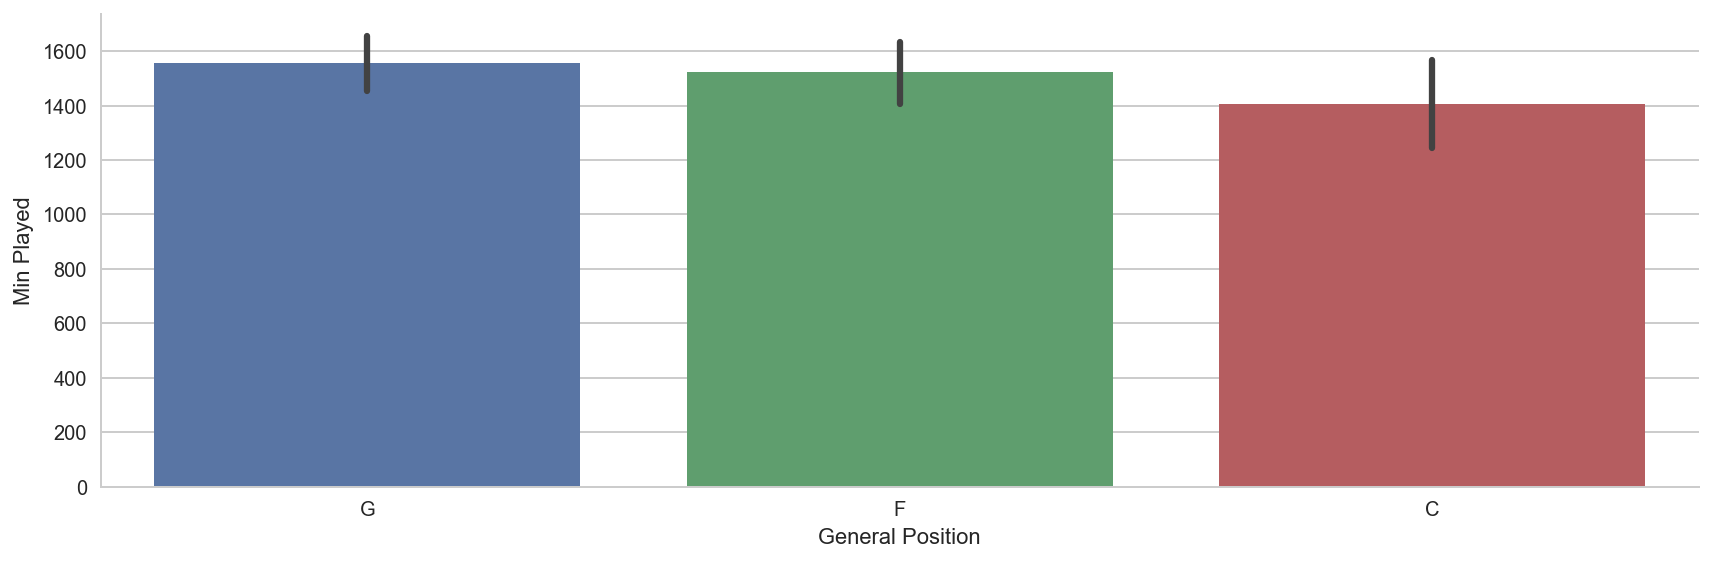

In [39]:
sns.factorplot(x = 'General Position', y = 'Min Played', data = df, kind = 'bar', aspect = 3)

# Statistical Modeling

In [63]:
from sklearn import cluster
from sklearn import metrics
from sklearn.linear_model import Lasso
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.grid_search import GridSearchCV
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_selection import SelectFromModel

## Preprocessing the Data

In [89]:
X = df.drop(['Position', 'General Position', 'Numbered Position', 'Age', 'Player', 'Min Played', 
             'Games Started', 'Team', '3P%', 'FT%', '2P%', 'FG%'], axis = 1)
y = df['General Position'].values

In [90]:
# Standardize the data

ss = StandardScaler()
Xs = ss.fit_transform(X)

## Multinomial Logistic Regression

Using Multinomial Logistc Regression Mode to optimize a model that predicts the category of player based on various features accumulated over the course of the 2016-2017 regular season.

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.75, random_state = 12)

In [92]:
# Set up the model parameters

logreg_cv = LogisticRegressionCV(Cs = 100, cv = 5, penalty = 'l1', scoring = 'accuracy', solver = 'liblinear')
logreg_cv.fit(X_train, y_train)

LogisticRegressionCV(Cs=100, class_weight=None, cv=5, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
           refit=True, scoring='accuracy', solver='liblinear', tol=0.0001,
           verbose=0)

In [93]:
# Find the best parameters for each target class

logreg_cv.classes_

array(['C', 'F', 'G'], dtype=object)

In [94]:
# Find the best parameters (C) for each target class

print 'best C for class:'

# Build a dictionary that does a regression for each of the Positions. After the fit, it grabs the C value 
# for said logistic regression and puts them together.

best_C = {logreg_cv.classes_[i]:x for i, (x, c) in enumerate(zip(logreg_cv.C_, logreg_cv.classes_))}
print(best_C)

best C for class:
{'C': 0.046415888336127822, 'G': 0.35938136638046292, 'F': 0.24770763559917114}


In [95]:
# Build 3 logisitic regression models using the best parameters for each target class

# Fit the regular logit model to 'C', 'F', and 'G' classes using a Lasso penalty

logreg_1 = LogisticRegression(C = best_C['C'], penalty = 'l1', solver = 'liblinear', multi_class = 'ovr')
logreg_2 = LogisticRegression(C = best_C['F'], penalty = 'l1', solver = 'liblinear', multi_class = 'ovr')
logreg_3 = LogisticRegression(C = best_C['G'], penalty = 'l1', solver = 'liblinear', multi_class = 'ovr')

In [96]:
# Checking all of the outputs for each of the models

# Center
logreg_1.fit(X_train, y_train)

LogisticRegression(C=0.046415888336127822, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [97]:
# Forward
logreg_2.fit(X_train, y_train)

LogisticRegression(C=0.24770763559917114, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [98]:
# Guard
logreg_3.fit(X_train, y_train)

LogisticRegression(C=0.35938136638046292, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [99]:
# Use the calculated logregs to predict on the test set and store the predictions

Y_1_pred = logreg_1.predict(X_test)
Y_2_pred = logreg_2.predict(X_test)
Y_3_pred = logreg_3.predict(X_test)

In [100]:
# Store confusion matrix for Y Test and Y Pred  
conf_mat_1 = confusion_matrix(y_test, Y_1_pred, labels = logreg_1.classes_)
# Convert  np.matrix format matrix to a DataFrame, adds index, and column names
conf_mat_1 = pd.DataFrame(conf_mat_1, columns = logreg_1.classes_, index = logreg_1.classes_)

conf_mat_2 = confusion_matrix(y_test, Y_2_pred, labels = logreg_2.classes_)
conf_mat_2 = pd.DataFrame(conf_mat_2, columns = logreg_2.classes_, index = logreg_2.classes_)

conf_mat_3 = confusion_matrix(y_test, Y_3_pred, labels = logreg_3.classes_)
conf_mat_3 = pd.DataFrame(conf_mat_3, columns = logreg_3.classes_, index = logreg_3.classes_)

print 'Best parameters for Centers (C):'
print conf_mat_1

print 'Best parameters for Forwards (F):'
print conf_mat_2

print 'Best parameters for Guards (G):'
print conf_mat_3

Best parameters for Centers (C):
    C   F    G
C  40  18    0
F  22  65   21
G   0  15  106
Best parameters for Forwards (F):
    C   F    G
C  42  15    1
F  24  60   24
G   0  13  108
Best parameters for Guards (G):
    C   F    G
C  42  15    1
F  27  56   25
G   0  14  107


In [101]:
print 'Classification Report for Centers (C):'
print classification_report(y_test, Y_1_pred)

print 'Classification Report for Forwards (F):'
print classification_report(y_test, Y_2_pred)

print 'Classification Report for Guards (G):'
print classification_report(y_test, Y_3_pred)

Classification Report for Centers (C):
             precision    recall  f1-score   support

          C       0.65      0.69      0.67        58
          F       0.66      0.60      0.63       108
          G       0.83      0.88      0.85       121

avg / total       0.73      0.74      0.73       287

Classification Report for Forwards (F):
             precision    recall  f1-score   support

          C       0.64      0.72      0.68        58
          F       0.68      0.56      0.61       108
          G       0.81      0.89      0.85       121

avg / total       0.73      0.73      0.73       287

Classification Report for Guards (G):
             precision    recall  f1-score   support

          C       0.61      0.72      0.66        58
          F       0.66      0.52      0.58       108
          G       0.80      0.88      0.84       121

avg / total       0.71      0.71      0.71       287



## Dimensionality Reduction with Principal Component Analysis

Because there are over 20 features (many of which have a good deal of collinearity), I decided to use PCA to assign differing weights to each component & it's effect on player position assignments.

In [102]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [103]:
pca = PCA(n_components = 3)

X_pca = pca.fit_transform(Xs)
print "Cumulative Explained Variance:",  pca.explained_variance_ratio_

Cumulative Explained Variance: [ 0.53443244  0.17973553  0.07365429]


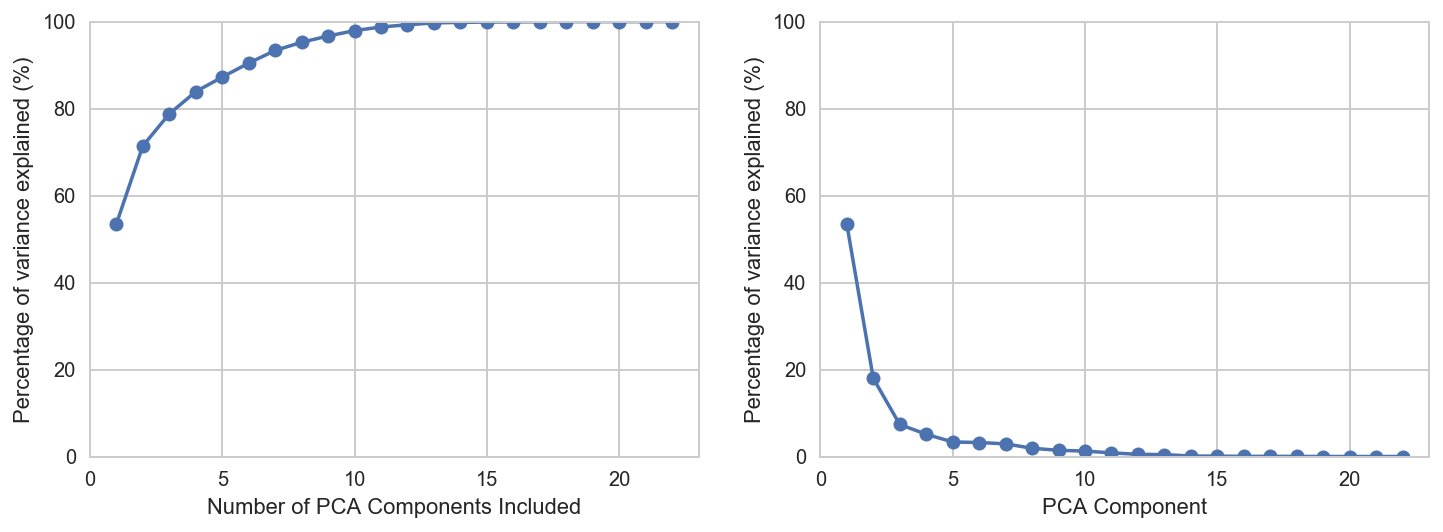

In [104]:
pca = PCA() 
pca.fit(Xs) # Pull out principle components from Xs features
var_expl = pca.explained_variance_ratio_ # find amount of variance explained by each component
tot_var_expl = np.array([sum(var_expl[0:i+1]) for i,x in enumerate(var_expl)]) #create vector with cumulative variance

# Create cumulative proportion of variance plot
plt.figure(figsize=(12,4)) 
plt.subplot(1,2,1)
plt.plot(range(1,len(tot_var_expl)+1), tot_var_expl*100,'o-')
plt.axis([0, len(tot_var_expl)+1, 0, 100])
plt.xlabel('Number of PCA Components Included')
plt.ylabel('Percentage of variance explained (%)')

# Create scree plot
plt.subplot(1,2,2) 
plt.plot(range(1,len(var_expl)+1), var_expl*100,'o-')
plt.axis([0, len(var_expl)+1, 0, 100])
plt.xlabel('PCA Component')
plt.ylabel('Percentage of variance explained (%)')

In [105]:
pca.components_

array([[  1.91928815e-01,   2.78549208e-01,   2.71722263e-01,
          1.50635557e-01,   1.56524308e-01,   2.69715671e-01,
          2.68547281e-01,   7.55960115e-02,   2.56169947e-01,
          2.63159995e-01,   1.63252148e-01,   2.38838470e-01,
          2.26321575e-01,   2.00423502e-01,   2.17601031e-01,
          1.62437265e-01,   2.61045903e-01,   2.21545282e-01,
          2.77289203e-01,   1.00811282e-02,   1.36093132e-01,
          1.32411663e-01],
       [  1.56547132e-02,  -6.25119736e-02,  -1.29350191e-01,
         -3.06010470e-01,  -3.12702122e-01,   5.11507859e-02,
          4.40940237e-03,   1.95528834e-01,  -9.86762297e-02,
         -4.49800977e-02,   3.64925558e-01,   2.12495693e-01,
          2.68933816e-01,  -2.58065959e-01,  -1.11903238e-01,
          3.50047700e-01,  -1.25357341e-01,   1.43558236e-01,
         -1.05366194e-01,  -3.03101771e-01,   3.59550855e-01,
         -1.19104562e-01],
       [ -3.19371347e-01,  -4.89449823e-02,  -5.86720748e-02,
         -3.9583

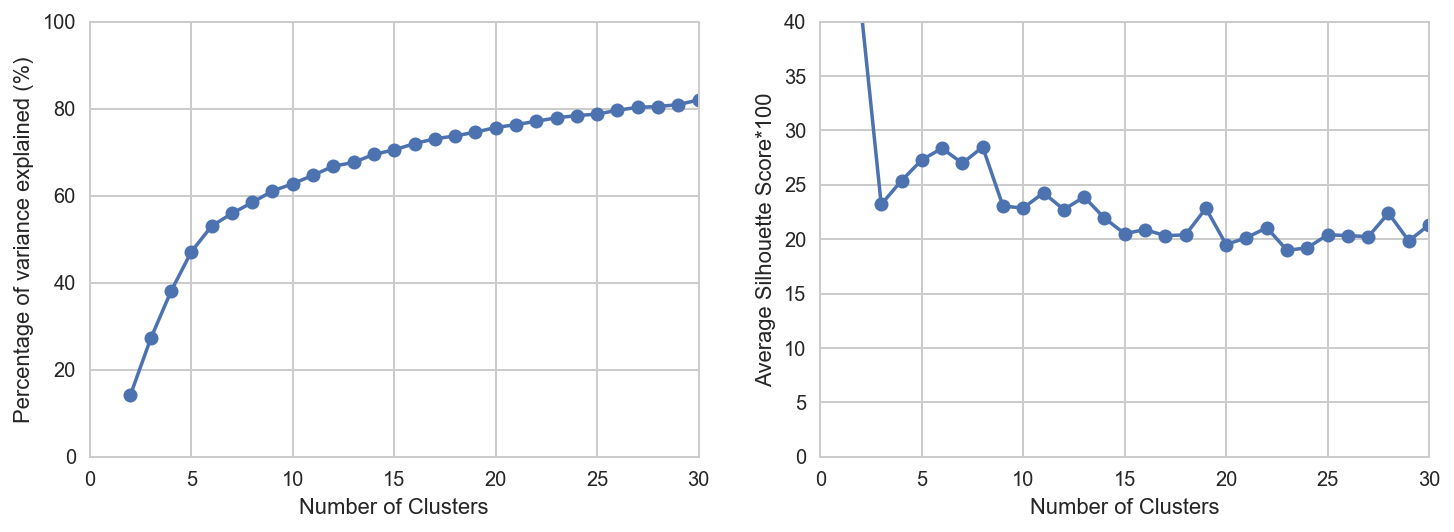

In [113]:
from scipy.spatial.distance import cdist, pdist, euclidean
from sklearn import metrics

reduced_data = PCA(n_components=5, whiten=True).fit_transform(X) #transform data into the 5 PCA components space
#kmeans assumes clusters have equal variance, and whitening helps keep this assumption.

k_range = range(2,31) #looking amount of variance explained by 1 through 30 cluster
k_means_var = [KMeans(n_clusters=k).fit(reduced_data) for k in k_range] #fit kmeans with 1 cluster to 30 clusters

#get labels and calculate silhouette score
labels = [i.labels_ for i in k_means_var]
sil_score = [metrics.silhouette_score(reduced_data,i,metric='euclidean') for i in labels]

centroids = [i.cluster_centers_ for i in k_means_var] #get the center of each cluster
k_euclid = [cdist(reduced_data,cent,'euclidean') for cent in centroids] #calculate distance between each item and each cluster center
dist = [np.min(ke,axis=1) for ke in k_euclid] #get the distance between each item and its cluster

wcss = [sum(d**2) for d in dist] #within cluster sum of squares
tss = sum(pdist(reduced_data)**2/reduced_data.shape[0]) #total sum of squares
bss = tss-wcss #between cluster sum of squares

plt.clf()
plt.figure(figsize=(12,4)) #create cumulative proportion of variance plot
plt.subplot(1,2,1)
plt.plot(k_range, bss/tss*100,'o-')
plt.axis([0, np.max(k_range), 0, 100])
plt.xlabel('Number of Clusters')
plt.ylabel('Percentage of variance explained (%)');

plt.subplot(1,2,2) #create scree plot
plt.plot(k_range, np.transpose(sil_score)*100,'o-')
plt.axis([0, np.max(k_range), 0, 40])
plt.xlabel('Number of Clusters');
plt.ylabel('Average Silhouette Score*100');

## K-Means Clustering

In using the K-Means model, I initially wanted to only remove the target feature, Position from the dataset. However, I went ahead and removed the Player, Age, Min Played, Games Started, and Team columns since they were text columns, as well as the shooting percentage stats features due to some null values and extremely high multi-collinearity in addition to the Position feature.

## Flat Clustering

Here, I'll cluster the data based on the X (standardized) and y variables above. Since there are 5 positions on a team, I'll use 5 cluster splits. Additionally, I'll include 3, 7 and 10 cluster splits. 

In [74]:
# 3 Cluster splits

kmeans3 = KMeans(n_clusters = 3)
kmeans3.fit(Xs)
y_kmeans3 = kmeans3.predict(Xs)

In [75]:
# 5 Cluster splits

kmeans5 = KMeans(n_clusters = 5)
kmeans5.fit(Xs)
y_kmeans5 = kmeans5.predict(Xs)

In [76]:
# 7 Cluster splits

kmeans7 = KMeans(n_clusters = 7)
kmeans7.fit(Xs)
y_kmeans7 = kmeans7.predict(Xs)

----------------------------------------------------------------------------------------------------------------------

### Statistical Analysis and Visualizations for the Guard Position

Used the 3PT% and the A:T Ratio to identify the guard clusters.
Typically, guards are expected to have a reasonable to high 3PT% and more assists than turnovers (known as "taking care of the ball")

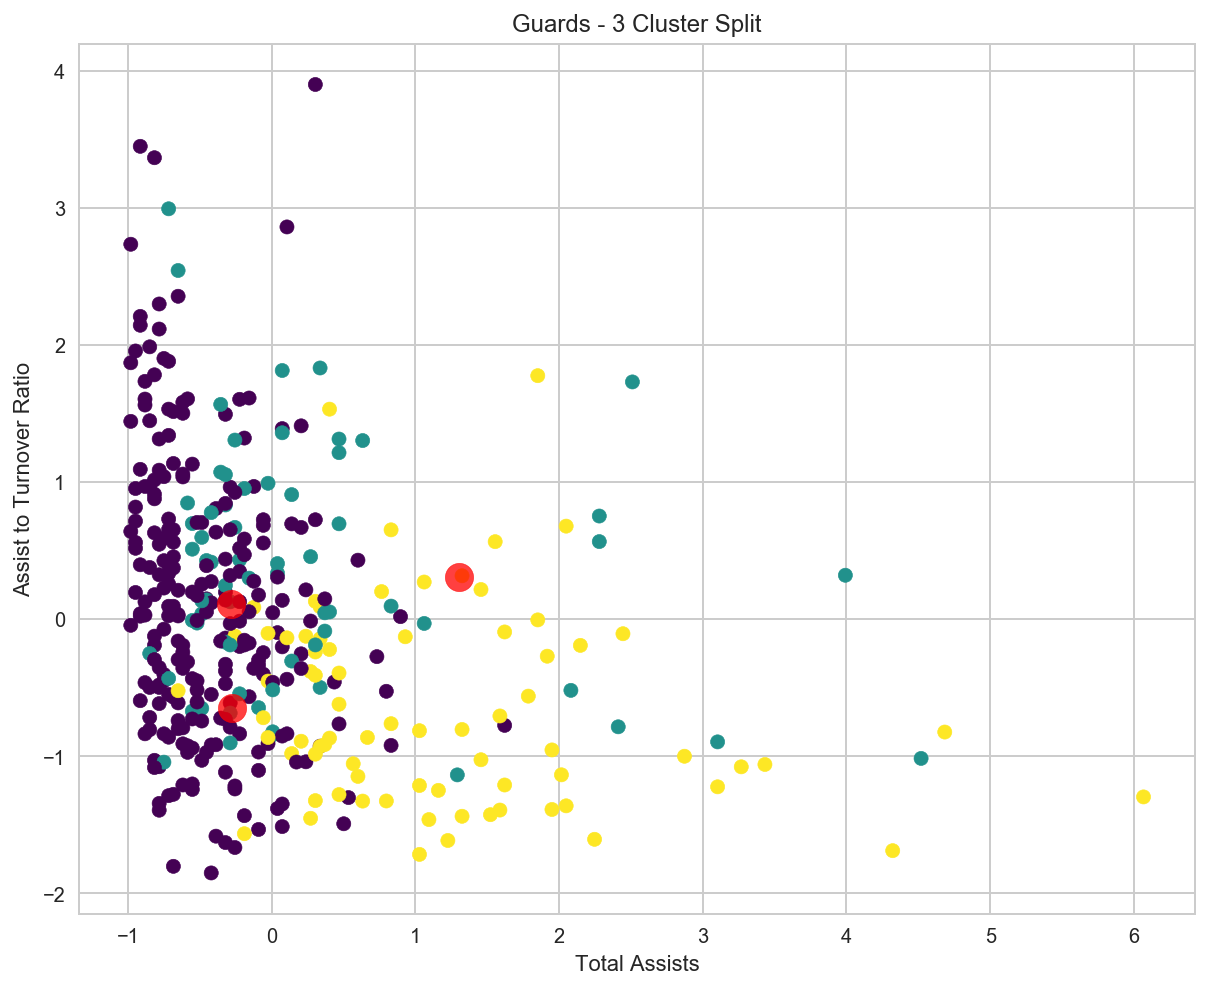

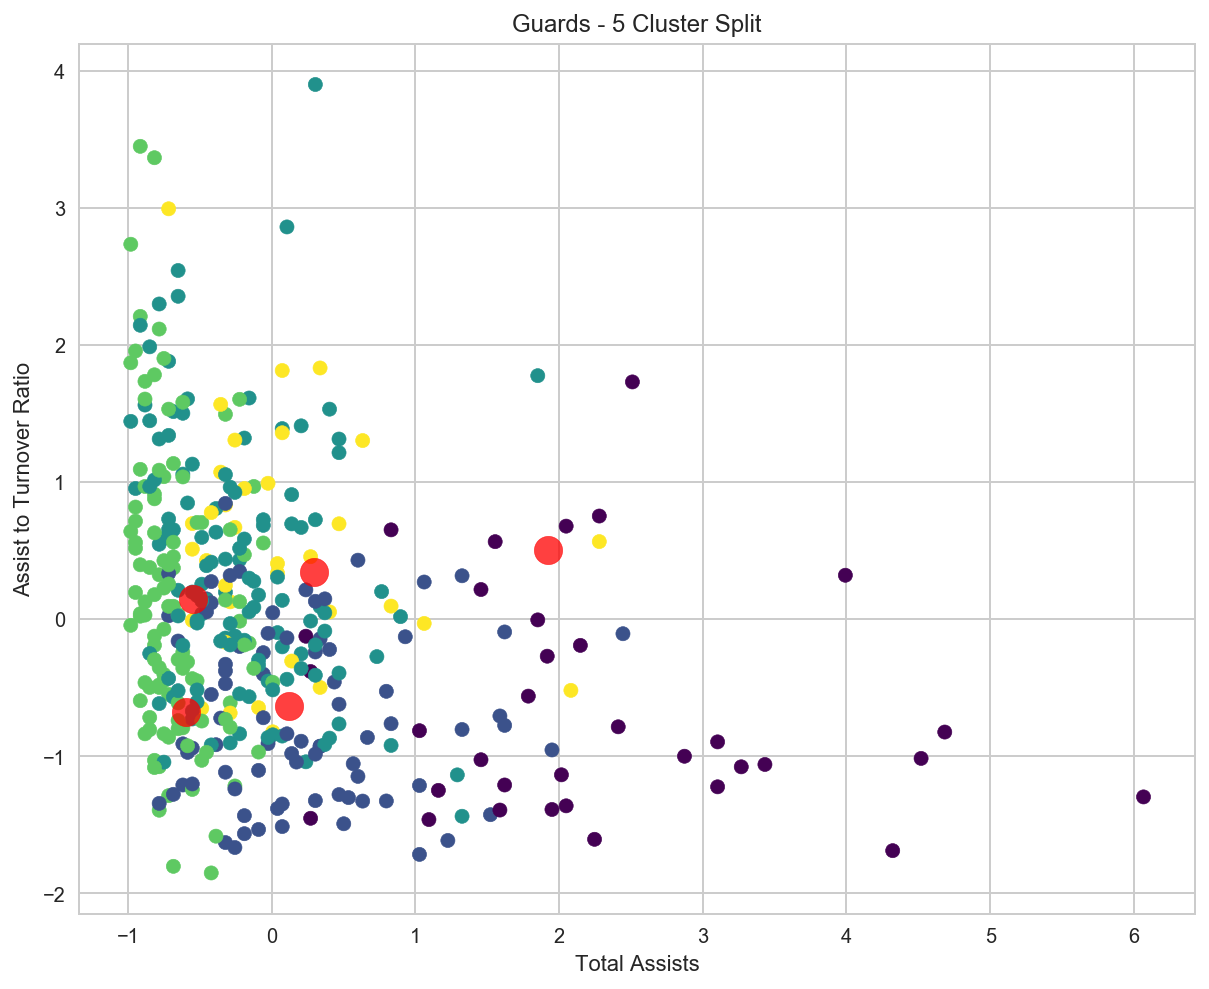

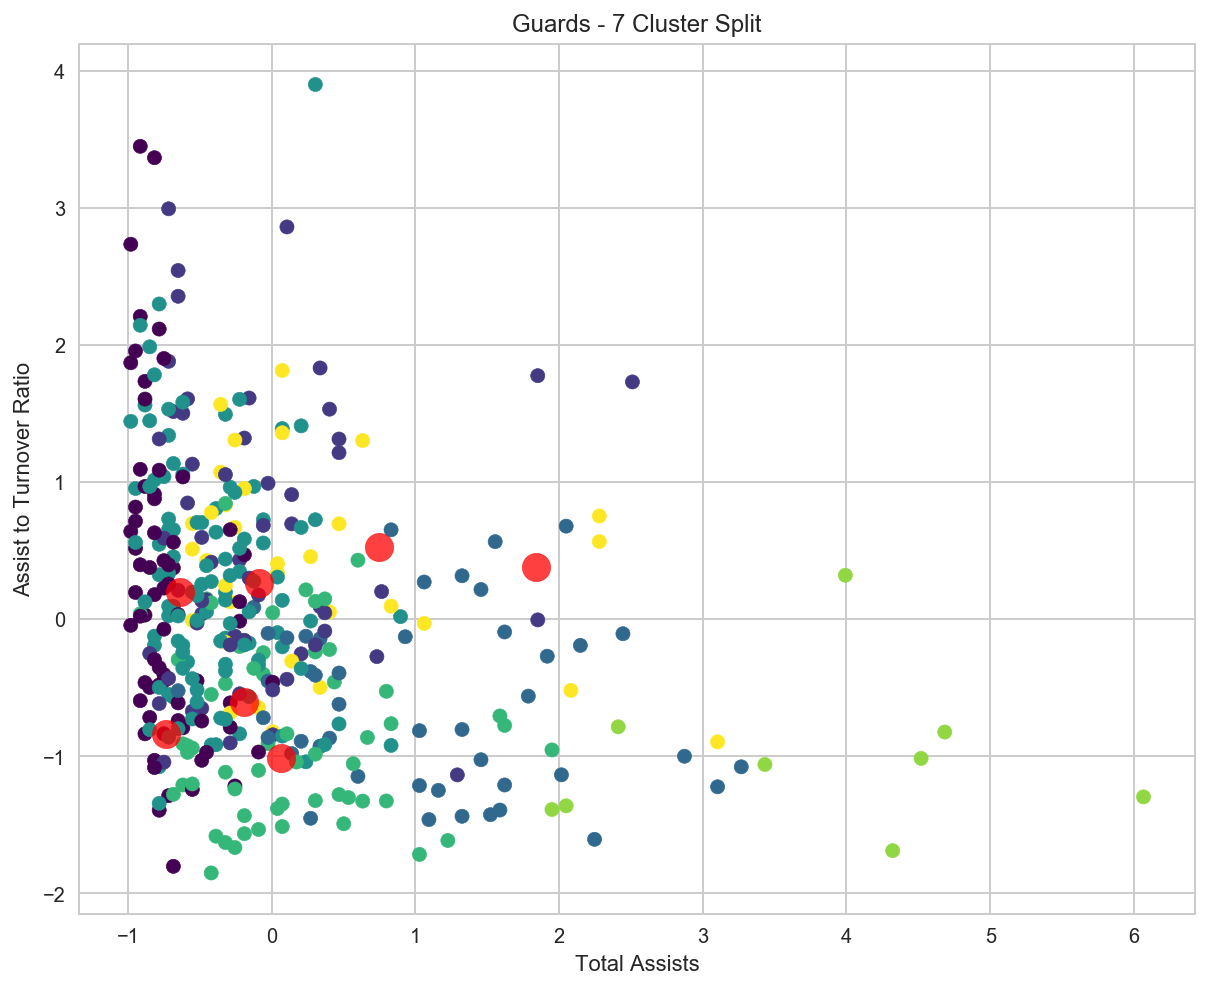

In [109]:
# Visualizaton of 3 cluster split

plt.figure(figsize = (10, 8))
plt.scatter(Xs[:, 15], Xs[:, -3], c = y_kmeans3, s = 50, cmap = 'viridis')

centroids = kmeans3.cluster_centers_
plt.scatter(centroids[:, 15], centroids[:, -3], c = 'red', s = 200, alpha = 0.75)

plt.title('Guards - 3 Cluster Split')
plt.xlabel('Total Assists')
plt.ylabel('Assist to Turnover Ratio')


# Visualizaton of 5 cluster split

plt.figure(figsize = (10, 8))
plt.scatter(Xs[:, 15], Xs[:, -3], c = y_kmeans5, s = 50, cmap = 'viridis')

centroids = kmeans5.cluster_centers_
plt.scatter(centroids[:, 15], centroids[:, -3], c = 'red', s = 200, alpha = 0.75)

plt.title('Guards - 5 Cluster Split')
plt.xlabel('Total Assists')
plt.ylabel('Assist to Turnover Ratio')


# Visualization of 7 cluster split

plt.figure(figsize = (10, 8))
plt.scatter(Xs[:, 15], Xs[:, -3], c = y_kmeans7, s = 50, cmap = 'viridis')

centroids = kmeans7.cluster_centers_
plt.scatter(centroids[:, 15], centroids[:, -3], c = 'red', s = 200, alpha = 0.75)

plt.title('Guards - 7 Cluster Split')
plt.xlabel('Total Assists')
plt.ylabel('Assist to Turnover Ratio')

----------------------------------------------------------------------------------------------------------------------

### Statistical Analysis and Visualizations for the Forward Position

Used the TO:MP Ratio and the 2PT% to identify the forward clusters. Typically, forwards are "swing players" who are versitile enough to play either the guard or post/center positions. They are expected to take care of the ball and have a reasonable to high 2PT, or midrange shooting percentage.

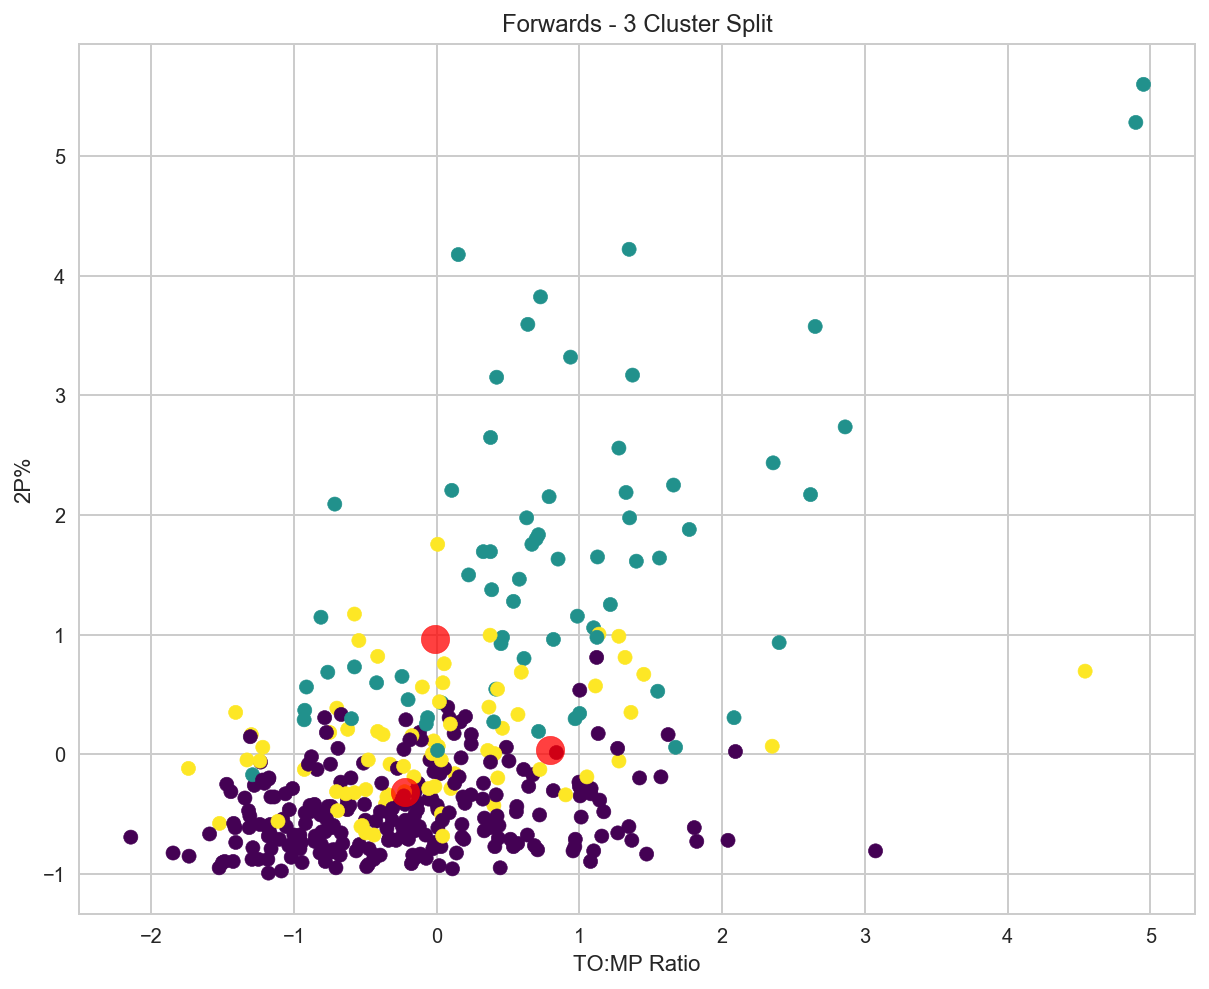

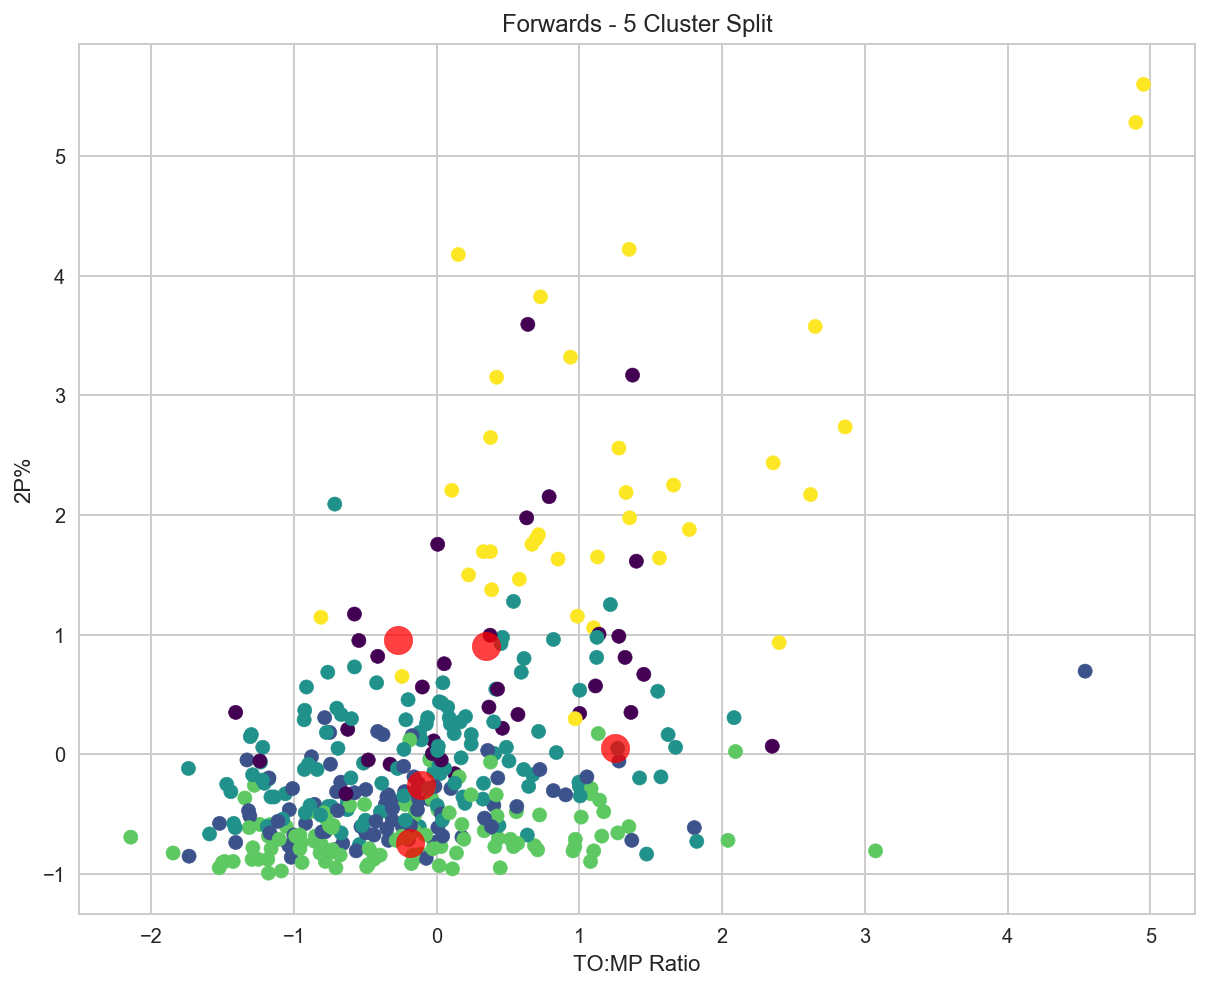

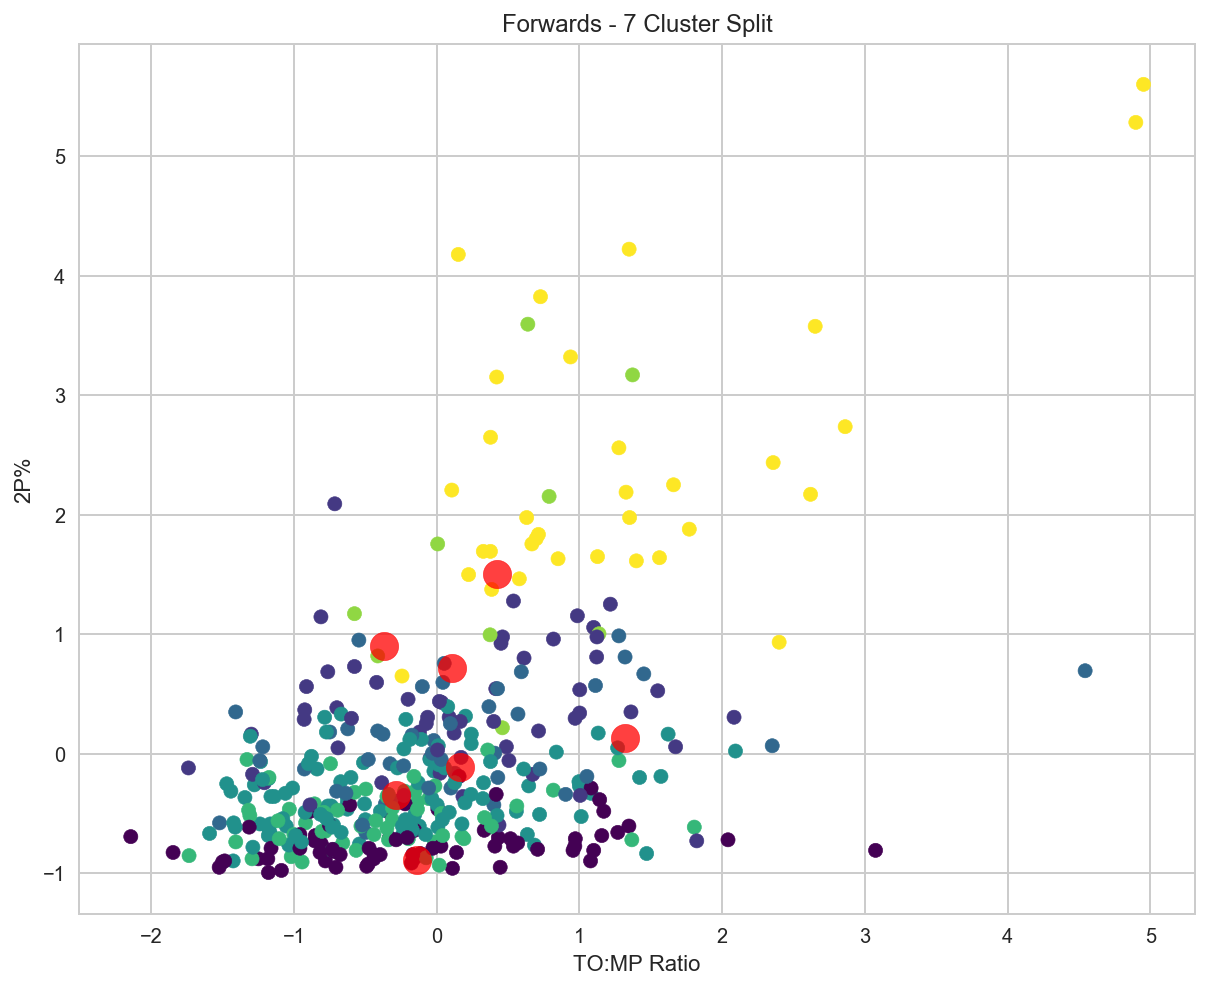

In [110]:
# Visualizaton of 3 cluster split

plt.figure(figsize = (10, 8))
plt.scatter(Xs[:, -1], Xs[:, 8], c = y_kmeans3, s = 50, cmap = 'viridis')

centroids = kmeans3.cluster_centers_
plt.scatter(centroids[:, -1], centroids[:, 8], c = 'red', s = 200, alpha = 0.75)

plt.title('Forwards - 3 Cluster Split')
plt.xlabel('TO:MP Ratio')
plt.ylabel('2P%')


# Visualizaton of 5 cluster split

plt.figure(figsize = (10, 8))
plt.scatter(Xs[:, -1], Xs[:, 8], c = y_kmeans5, s = 50, cmap = 'viridis')

centroids = kmeans5.cluster_centers_
plt.scatter(centroids[:, -1], centroids[:, 8], c = 'red', s = 200, alpha = 0.75)

plt.title('Forwards - 5 Cluster Split')
plt.xlabel('TO:MP Ratio')
plt.ylabel('2P%')


# # Visualizaton of 7 cluster split

plt.figure(figsize = (10, 8))
plt.scatter(Xs[:, -1], Xs[:, 8], c = y_kmeans7, s = 50, cmap = 'viridis')

centroids = kmeans7.cluster_centers_
plt.scatter(centroids[:, -1], centroids[:, 8], c = 'red', s = 200, alpha = 0.75)

plt.title('Forwards - 7 Cluster Split')
plt.xlabel('TO:MP Ratio')
plt.ylabel('2P%')

----------------------------------------------------------------------------------------------------------------------

### Statistical Analysis and Visualizations for the Center Position

Used the Blocks per Game and the A:T Ratio to identify the center clusters. Typically, centers are expected to be the last line of defense around the basket, prevent the opposing team from scoring at the rim, and once they have the ball (from either block, pass or rebound), keep it in the offensive rotation or score.

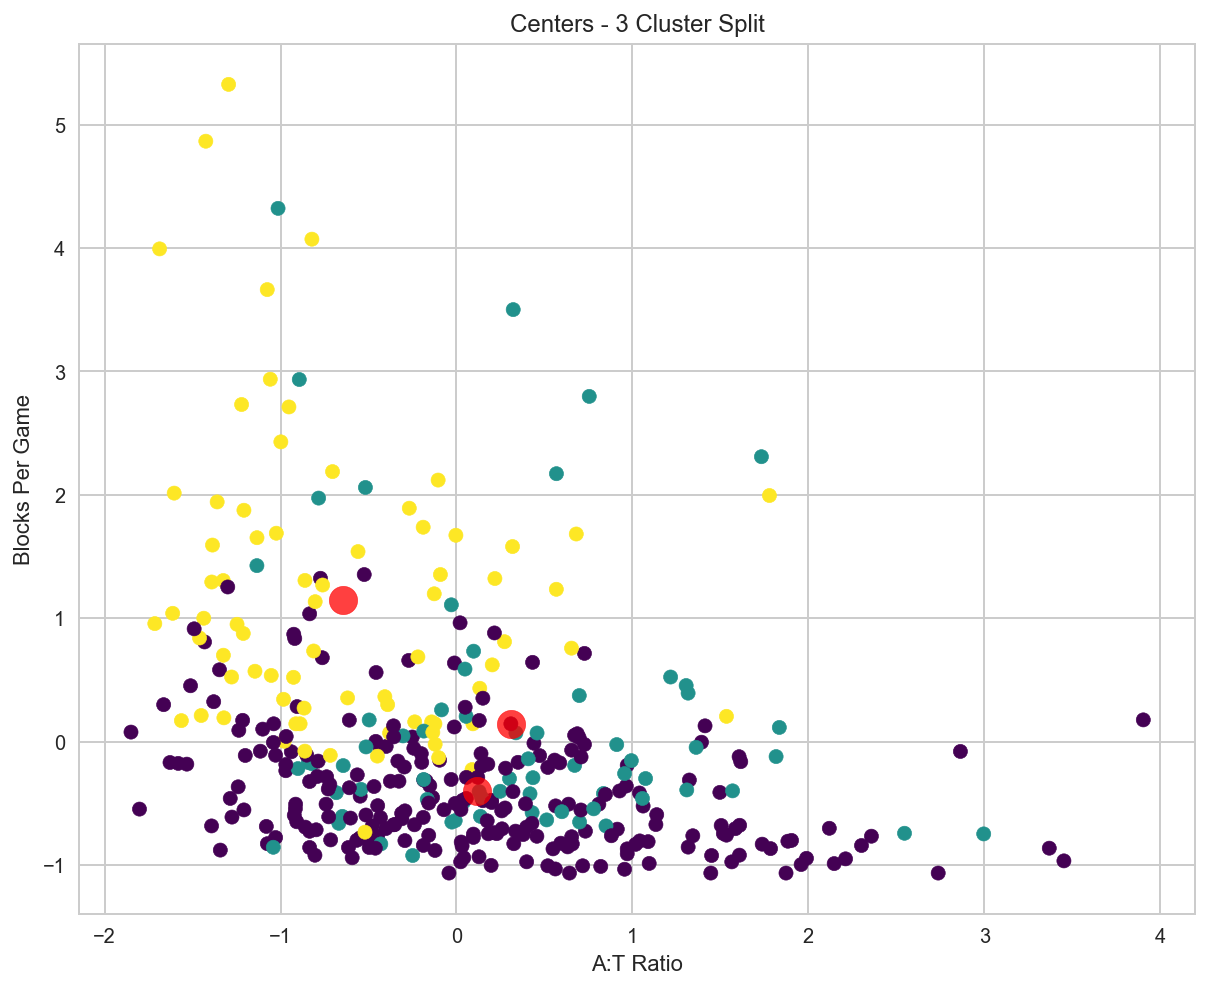

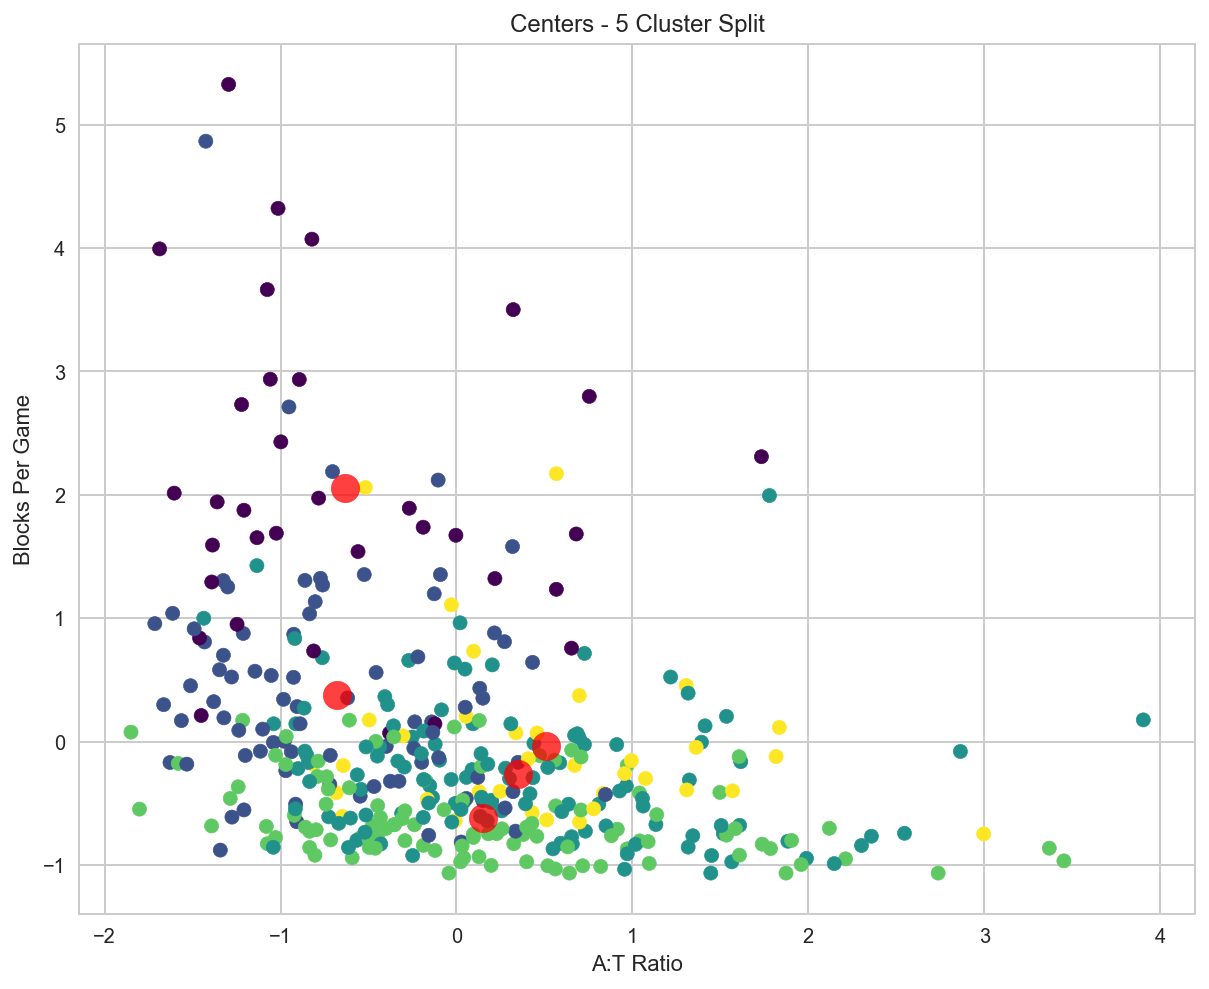

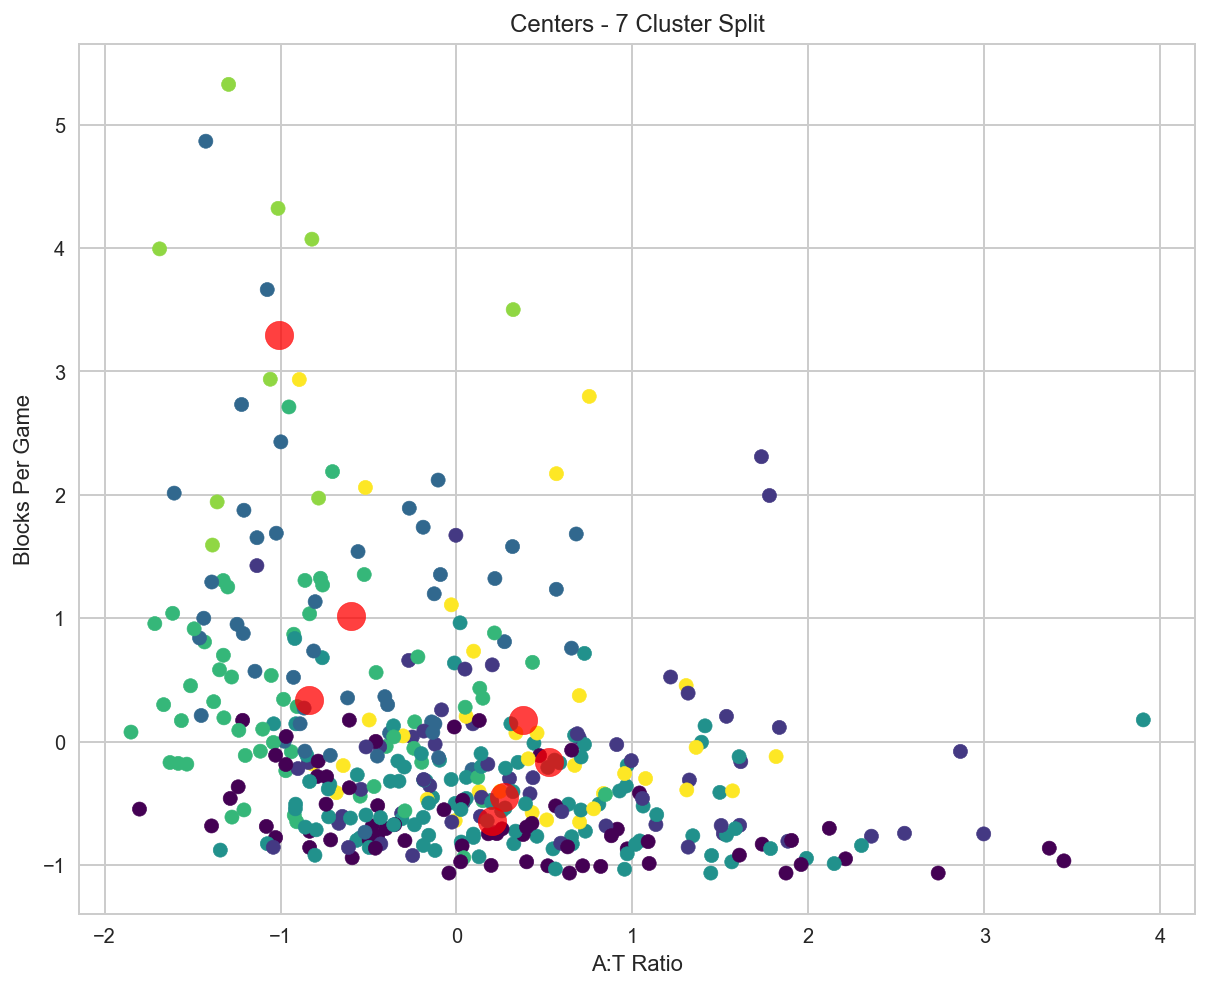

In [111]:
# Visualizaton of 3 cluster split

plt.figure(figsize = (10, 8))
plt.scatter(Xs[:, -3], Xs[:, -2], c = y_kmeans3, s = 50, cmap = 'viridis')

centroids = kmeans3.cluster_centers_
plt.scatter(centroids[:, -3], centroids[:, -2], c = 'red', s = 200, alpha = 0.75)

plt.title('Centers - 3 Cluster Split')
plt.xlabel('A:T Ratio')
plt.ylabel('Blocks Per Game')


# Visualizaton of 5 cluster split

plt.figure(figsize = (10, 8))
plt.scatter(Xs[:, -3], Xs[:, -2], c = y_kmeans5, s = 50, cmap = 'viridis')

centroids = kmeans5.cluster_centers_
plt.scatter(centroids[:, -3], centroids[:, -2], c = 'red', s = 200, alpha = 0.75)

plt.title('Centers - 5 Cluster Split')
plt.xlabel('A:T Ratio')
plt.ylabel('Blocks Per Game')


# Visualizaton of 7 cluster split

plt.figure(figsize = (10, 8))
plt.scatter(Xs[:, -3], Xs[:, -2], c = y_kmeans7, s = 50, cmap = 'viridis')

centroids = kmeans7.cluster_centers_
plt.scatter(centroids[:, -3], centroids[:, -2], c = 'red', s = 200, alpha = 0.75)

plt.title('Centers - 7 Cluster Split')
plt.xlabel('A:T Ratio')
plt.ylabel('Blocks Per Game')

# Results / Conclusion

When using only the General Position as the target, in conjunction with a couple of the important statistics per position, I felt that my results were inconclusive. While we can see the groupings of the clusters above, I would like to adjust the target variable for the clustering to see if the clusters become more detailed and are able to correctly identify players' positions. I included the beginnings of this with the MLR model for both the general and traditional postions.

Another thing that I think would positively impact this project is adding the cluster number of each player to a new DataFrame. That way I can pull the cluster groupings by cluster number to evaluate whether the players were grouped with others that have the same position, and what they do have in common if the players are not in the same position.

Lastly, to aid with determining a more conclusive result, I want to test out more of the position-specific statstical metrics that are considered for each of the 5 traditional positions.

# Presentation Link

https://prezi.com/view/g2aDmKCss5KEyuecLVsc/